### Javier Delgado Final Project: S&P500 stock prices prediction

- This project is about to predict the value of one stock or a full portfolio within the S&P500
- The predictors will be the same stock but with previous closing prices, other stocks with high correlations the fixed income market treasury bonds yields and the 3 main stock market indicators: NASDAQ, SP500 and DowJones
  - Data: All SP500 stocks, Treasury bond yields and stock markets indexes


In [206]:
import pandas as pd 
import datetime
from datetime import datetime
from datetime import date
from pandas_datareader import data, wb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
## Getting the data

# First: Getting the symbols of all stocks listed in the S&P 500 with wikipedia

html_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

sp500_stocks_symbols = html_data[0][['Symbol','Security']]
sp500_stocks_symbols.head() 

Symbol             Security
0    MMM           3M Company
1    ABT  Abbott Laboratories
2   ABBV          AbbVie Inc.
3   ABMD          ABIOMED Inc
4    ACN        Accenture plc

In [101]:
# Second : Getting the stock market reporting dates from Jan 2017 to the most recent date of reporting in the NYSE

import pandas_market_calendars as mcal
import datetime
from datetime import datetime
from datetime import date


nyse = mcal.get_calendar('NYSE')
nyse_calendar = nyse.schedule(start_date='2017-01-01', end_date='2050-01-01').reset_index(level = 0).rename(columns={"index": "Reporting date"})
reporting_dates = nyse_calendar[['Reporting date']]
reporting_dates['Reporting date'] = reporting_dates['Reporting date'].apply(lambda x: str(x))
reporting_dates = reporting_dates[reporting_dates['Reporting date'] <= str(date.today())]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [102]:
reporting_dates.head()

Reporting date
0  2017-01-03 00:00:00
1  2017-01-04 00:00:00
2  2017-01-05 00:00:00
3  2017-01-06 00:00:00
4  2017-01-09 00:00:00

In [105]:
# Create the data frame that will contain all S&P 500 closing prices and other economic indexes from Jan 2017 to the last reporting date
financial_historical_data = pd.DataFrame({"Reporting Date": reporting_dates['Reporting date']})
financial_historical_data.head()

Reporting Date
0  2017-01-03 00:00:00
1  2017-01-04 00:00:00
2  2017-01-05 00:00:00
3  2017-01-06 00:00:00
4  2017-01-09 00:00:00

In [106]:
# Getting all the stocks closing prices for each stock and adding them to the historical data frame

for symbol in sp500_stocks_symbols["Symbol"]:
    
    try:
        stock_data = data.DataReader(symbol, 'yahoo', "2017-01-01" , "2050-01-01").sort_index().reset_index(level = 0)[['Date','Close']]
        financial_historical_data[symbol] = stock_data["Close"]
    except:
        pass
    

financial_historical_data.head()

Reporting Date         MMM        ABT       ABBV        ABMD  \
0  2017-01-03 00:00:00  178.050003  39.049999  62.410000  112.360001   
1  2017-01-04 00:00:00  178.320007  39.360001  63.290001  115.739998   
2  2017-01-05 00:00:00  177.710007  39.700001  63.770000  114.809998   
3  2017-01-06 00:00:00  178.229996  40.779999  63.790001  115.419998   
4  2017-01-09 00:00:00  177.270004  40.740002  64.209999  117.110001   

          ACN       ATVI        ADBE    AMD         AAP  ...       WYNN  \
0  116.459999  36.639999  103.480003  11.43  170.600006  ...  87.459999   
1  116.739998  37.360001  104.139999  11.43  172.000000  ...  90.279999   
2  114.989998  37.939999  105.910004  11.24  171.880005  ...  91.440002   
3  116.300003  37.910000  108.300003  11.32  169.630005  ...  92.430000   
4  115.000000  37.700001  108.570000  11.49  169.529999  ...  92.750000   

         XEL        XRX       XLNX        XYL        YUM       ZBRA  \
0  40.619999  27.559999  59.070000  49.650002  63.209999  86.250000   
1  40.799999  28.600000  58.639999  50.389999  63.439999  87.029999   
2  40.799999  28.480000  57.930000  49.930000  63.650002  84.750000   
3  40.919998  28.040001  59.049999  49.580002  64.419998  85.959999   
4  40.299999  27.879999  59.060001  49.369999  64.599998  85.970001   

          ZBH       ZION        ZTS  
0  103.330002  43.180000  53.590000  
1  104.279999  43.799999  54.110001  
2  104.949997  43.090000  53.930000  
3  104.959999  43.369999  54.099998  
4  107.000000  42.900002  53.950001  

[5 rows x 504 columns]

In [117]:
# DROPING STOCKS WITH NULL VALUES IN MY DATA FRAME
financial_historical_data = financial_historical_data.dropna(axis=1, how="any")
financial_historical_data.head()

Reporting Date         MMM        ABT       ABBV        ABMD  \
0  2017-01-03 00:00:00  178.050003  39.049999  62.410000  112.360001   
1  2017-01-04 00:00:00  178.320007  39.360001  63.290001  115.739998   
2  2017-01-05 00:00:00  177.710007  39.700001  63.770000  114.809998   
3  2017-01-06 00:00:00  178.229996  40.779999  63.790001  115.419998   
4  2017-01-09 00:00:00  177.270004  40.740002  64.209999  117.110001   

          ACN       ATVI        ADBE    AMD         AAP  ...       WYNN  \
0  116.459999  36.639999  103.480003  11.43  170.600006  ...  87.459999   
1  116.739998  37.360001  104.139999  11.43  172.000000  ...  90.279999   
2  114.989998  37.939999  105.910004  11.24  171.880005  ...  91.440002   
3  116.300003  37.910000  108.300003  11.32  169.630005  ...  92.430000   
4  115.000000  37.700001  108.570000  11.49  169.529999  ...  92.750000   

         XEL        XRX       XLNX        XYL        YUM       ZBRA  \
0  40.619999  27.559999  59.070000  49.650002  63.209999  86.250000   
1  40.799999  28.600000  58.639999  50.389999  63.439999  87.029999   
2  40.799999  28.480000  57.930000  49.930000  63.650002  84.750000   
3  40.919998  28.040001  59.049999  49.580002  64.419998  85.959999   
4  40.299999  27.879999  59.060001  49.369999  64.599998  85.970001   

          ZBH       ZION        ZTS  
0  103.330002  43.180000  53.590000  
1  104.279999  43.799999  54.110001  
2  104.949997  43.090000  53.930000  
3  104.959999  43.369999  54.099998  
4  107.000000  42.900002  53.950001  

[5 rows x 493 columns]

In [159]:
## Checking Null values in my new historical data frame

print(sum([i for i in financial_historical_data.isna().sum()]))
print(financial_historical_data.shape)

0
(970, 493)


In [208]:
#Getting the 3 main indexes in the US

Nasdaq_index = data.DataReader("^NDX", 'yahoo', "2017-01-01" , "2050-01-01").sort_index().reset_index(level = 0)[['Date','Close']]
SP500_index = data.DataReader("^GSPC", 'yahoo', "2017-01-01" , "2050-01-01").sort_index().reset_index(level = 0)[['Date','Close']]
Dowjones_index = data.DataReader("^DJI", 'yahoo', "2017-01-01" , "2050-01-01").sort_index().reset_index(level = 0)[['Date','Close']]

financial_indexes = pd.DataFrame({'Reporting Date':reporting_dates['Reporting date'], "NASDAQ": Nasdaq_index['Close'], "SP500": SP500_index['Close'], 'DowJones': Dowjones_index['Close']})
financial_indexes.head()

Reporting Date       NASDAQ        SP500      DowJones
0  2017-01-03 00:00:00  4911.330078  2257.830078  19881.759766
1  2017-01-04 00:00:00  4937.209961  2270.750000  19942.160156
2  2017-01-05 00:00:00  4964.950195  2269.000000  19899.289062
3  2017-01-06 00:00:00  5007.080078  2276.979980  19963.800781
4  2017-01-09 00:00:00  5024.899902  2268.899902  19887.380859

In [195]:
## GETTING FIX INCOME MARKET DATA: Daily Treasury Yield Curve Rates
treasury_yields_list = [[],[],[],[],[],[],[],[],[],[],[],[],[]]

current_year = date.today().year
year = 2017

while year <= current_year:
    
    yields_html_data = pd.read_html(f'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year={str(year)}')[1]
    
    list_iterator = 0 
    while list_iterator <= 12:
        for column in yields_html_data.columns:
            if column == "Date":
                for data in yields_html_data[column]:
                    treasury_yields_list[list_iterator].append(data)
                list_iterator += 1
            else:
                for data in yields_html_data[column]:
                    treasury_yields_list[list_iterator].append(float(data)/100)
                list_iterator += 1
            
    year += 1

treasury_yields = pd.DataFrame({'Reporting Date': treasury_yields_list[0],
                                '1 month Tbond': treasury_yields_list[1],
                                '2 month Tbond': treasury_yields_list[2],
                                '3 month Tbond': treasury_yields_list[3],
                                '6 month Tbond': treasury_yields_list[4],
                                '1 year Tbond': treasury_yields_list[5],
                                '2 year Tbond': treasury_yields_list[6],
                                '3 year Tbond': treasury_yields_list[7],
                                '5 year Tbond': treasury_yields_list[8],
                                '7 year Tbond': treasury_yields_list[9],
                                '10 year Tbond': treasury_yields_list[10],
                                '20 year Tbond': treasury_yields_list[11],
                                '30 year Tbond': treasury_yields_list[12] })
treasury_yields


Reporting Date  1 month Tbond  2 month Tbond  3 month Tbond  \
0         01/03/17         0.0052            NaN         0.0053   
1         01/04/17         0.0049            NaN         0.0053   
2         01/05/17         0.0051            NaN         0.0052   
3         01/06/17         0.0050            NaN         0.0053   
4         01/09/17         0.0050            NaN         0.0050   
..             ...            ...            ...            ...   
960       11/02/20         0.0009         0.0009         0.0009   
961       11/03/20         0.0009         0.0010         0.0010   
962       11/04/20         0.0008         0.0009         0.0010   
963       11/05/20         0.0009         0.0010         0.0010   
964       11/06/20         0.0010         0.0010         0.0010   

     6 month Tbond  1 year Tbond  2 year Tbond  3 year Tbond  5 year Tbond  \
0           0.0065        0.0089        0.0122        0.0150        0.0194   
1           0.0063        0.0087        0.0124        0.0150        0.0194   
2           0.0062        0.0083        0.0117        0.0143        0.0186   
3           0.0061        0.0085        0.0122        0.0150        0.0192   
4           0.0060        0.0082        0.0121        0.0147        0.0189   
..             ...           ...           ...           ...           ...   
960         0.0011        0.0013        0.0016        0.0020        0.0038   
961         0.0012        0.0014        0.0017        0.0021        0.0039   
962         0.0010        0.0012        0.0014        0.0018        0.0033   
963         0.0010        0.0012        0.0014        0.0018        0.0033   
964         0.0011        0.0012        0.0016        0.0021        0.0036   

     7 year Tbond  10 year Tbond  20 year Tbond  30 year Tbond  
0          0.0226         0.0245         0.0278         0.0304  
1          0.0226         0.0246         0.0278         0.0305  
2          0.0218         0.0237         0.0269         0.0296  
3          0.0223         0.0242         0.0273         0.0300  
4          0.0218         0.0238         0.0269         0.0297  
..            ...            ...            ...            ...  
960        0.0063         0.0087         0.0141         0.0163  
961        0.0065         0.0090         0.0144         0.0166  
962        0.0055         0.0078         0.0133         0.0155  
963        0.0056         0.0079         0.0132         0.0154  
964        0.0059         0.0083         0.0137         0.0160  

[965 rows x 13 columns]

In [214]:
# CONVERTING ALL DATES (STRING FORMATS) INTO TIMESTAMP

financial_historical_data['Reporting Date'] = pd.to_datetime(financial_historical_data['Reporting Date'])
treasury_yields['Reporting Date'] = pd.to_datetime(treasury_yields['Reporting Date'])
financial_indexes['Reporting Date'] = pd.to_datetime(financial_indexes['Reporting Date'])

for i in financial_historical_data['Reporting Date'][0:1]:
    print("SP500 Dates: ", type(i))
print('-------')
for i in treasury_yields['Reporting Date'][0:1]:
    print("Treasury Dates: ", type(i))
print('-------')
for i in financial_indexes['Reporting Date'][0:1]:
    print("indexes Dates: ", type(i))
print('-------')

SP500 Dates:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
-------
Treasury Dates:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
-------
indexes Dates:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
-------


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [244]:
## JOIN THE 3 DATA FRAMES INTO ONE TO GET OUR FINAL DATA FRAME

final_finacial_data = pd.merge(pd.merge(financial_historical_data,treasury_yields,how = "left", on = 'Reporting Date'), financial_indexes, how = "left", on = 'Reporting Date')
final_finacial_data.head()

Reporting Date         MMM        ABT       ABBV        ABMD         ACN  \
0     2017-01-03  178.050003  39.049999  62.410000  112.360001  116.459999   
1     2017-01-04  178.320007  39.360001  63.290001  115.739998  116.739998   
2     2017-01-05  177.710007  39.700001  63.770000  114.809998  114.989998   
3     2017-01-06  178.229996  40.779999  63.790001  115.419998  116.300003   
4     2017-01-09  177.270004  40.740002  64.209999  117.110001  115.000000   

        ATVI        ADBE    AMD         AAP  ...  2 year Tbond  3 year Tbond  \
0  36.639999  103.480003  11.43  170.600006  ...        0.0122        0.0150   
1  37.360001  104.139999  11.43  172.000000  ...        0.0124        0.0150   
2  37.939999  105.910004  11.24  171.880005  ...        0.0117        0.0143   
3  37.910000  108.300003  11.32  169.630005  ...        0.0122        0.0150   
4  37.700001  108.570000  11.49  169.529999  ...        0.0121        0.0147   

   5 year Tbond  7 year Tbond  10 year Tbond  20 year Tbond  30 year Tbond  \
0        0.0194        0.0226         0.0245         0.0278         0.0304   
1        0.0194        0.0226         0.0246         0.0278         0.0305   
2        0.0186        0.0218         0.0237         0.0269         0.0296   
3        0.0192        0.0223         0.0242         0.0273         0.0300   
4        0.0189        0.0218         0.0238         0.0269         0.0297   

        NASDAQ        SP500      DowJones  
0  4911.330078  2257.830078  19881.759766  
1  4937.209961  2270.750000  19942.160156  
2  4964.950195  2269.000000  19899.289062  
3  5007.080078  2276.979980  19963.800781  
4  5024.899902  2268.899902  19887.380859  

[5 rows x 508 columns]

In [245]:
#Checking all the null values in my joined data frame
sum([i for i in final_finacial_data.isna().sum()])

520

In [242]:
# Since Stock prices data frame and indexes data frame have the same shape, the treasury bonds part probably will have all the missing values

test_null = final_finacial_data[['1 month Tbond','2 month Tbond','3 month Tbond','6 month Tbond','1 year Tbond','2 year Tbond','3 year Tbond','5 year Tbond','7 year Tbond',
                     '10 year Tbond','20 year Tbond','30 year Tbond','NASDAQ','SP500','DowJones']]
test_null.info()
                                

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 969
Data columns (total 15 columns):
1 month Tbond    964 non-null float64
2 month Tbond    516 non-null float64
3 month Tbond    964 non-null float64
6 month Tbond    964 non-null float64
1 year Tbond     964 non-null float64
2 year Tbond     964 non-null float64
3 year Tbond     964 non-null float64
5 year Tbond     964 non-null float64
7 year Tbond     964 non-null float64
10 year Tbond    964 non-null float64
20 year Tbond    964 non-null float64
30 year Tbond    964 non-null float64
NASDAQ           970 non-null float64
SP500            970 non-null float64
DowJones         970 non-null float64
dtypes: float64(15)
memory usage: 121.2 KB


In [247]:
#Getting rid of the 2 months treasury bond column and counting nulls again
final_finacial_data = final_finacial_data.drop(['2 month Tbond'],axis = 1)
sum([i for i in final_finacial_data.isna().sum()])


66

In [272]:
# USING THE mean to fill nthe last 66 null values
final_finacial_data = final_finacial_data.fillna(final_finacial_data.mean())
print(sum([i for i in final_finacial_data.isna().sum()]))

0
0


In [309]:
final_finacial_data.head()

Reporting Date         MMM        ABT       ABBV        ABMD         ACN  \
0     2017-01-03  178.050003  39.049999  62.410000  112.360001  116.459999   
1     2017-01-04  178.320007  39.360001  63.290001  115.739998  116.739998   
2     2017-01-05  177.710007  39.700001  63.770000  114.809998  114.989998   
3     2017-01-06  178.229996  40.779999  63.790001  115.419998  116.300003   
4     2017-01-09  177.270004  40.740002  64.209999  117.110001  115.000000   

        ATVI        ADBE    AMD         AAP  ...  2 year Tbond  3 year Tbond  \
0  36.639999  103.480003  11.43  170.600006  ...        0.0122        0.0150   
1  37.360001  104.139999  11.43  172.000000  ...        0.0124        0.0150   
2  37.939999  105.910004  11.24  171.880005  ...        0.0117        0.0143   
3  37.910000  108.300003  11.32  169.630005  ...        0.0122        0.0150   
4  37.700001  108.570000  11.49  169.529999  ...        0.0121        0.0147   

   5 year Tbond  7 year Tbond  10 year Tbond  20 year Tbond  30 year Tbond  \
0        0.0194        0.0226         0.0245         0.0278         0.0304   
1        0.0194        0.0226         0.0246         0.0278         0.0305   
2        0.0186        0.0218         0.0237         0.0269         0.0296   
3        0.0192        0.0223         0.0242         0.0273         0.0300   
4        0.0189        0.0218         0.0238         0.0269         0.0297   

        NASDAQ        SP500      DowJones  
0  4911.330078  2257.830078  19881.759766  
1  4937.209961  2270.750000  19942.160156  
2  4964.950195  2269.000000  19899.289062  
3  5007.080078  2276.979980  19963.800781  
4  5024.899902  2268.899902  19887.380859  

[5 rows x 507 columns]

In [306]:
final_finacial_data.describe()

MMM         ABT        ABBV        ABMD         ACN        ATVI  \
count  970.000000  970.000000  970.000000  970.000000  970.000000  970.000000   
mean   189.528980   71.021000   84.702969  240.967258  167.897722   61.138639   
std     26.741556   18.025793   13.063543   88.522183   32.138498   12.263783   
min    117.870003   39.049999   60.000000  104.099998  113.209999   36.639999   
25%    166.580006   56.377500   73.859999  167.237499  147.025002   49.269999   
50%    192.154999   70.529999   86.645000  235.330002  162.849998   61.164999   
75%    208.322502   84.589998   94.119999  302.290009  191.299995   71.307499   
max    258.630005  114.419998  123.209999  449.750000  247.179993   86.839996   

             ADBE         AMD         AAP         AES  ...  2 year Tbond  \
count  970.000000  970.000000  970.000000  970.000000  ...    970.000000   
mean   260.791897   29.144711  139.698866   14.299701  ...      0.016218   
std     98.659380   20.307795   25.107202    2.983805  ...      0.008303   
min    103.480003    9.530000   75.029999    9.560000  ...      0.001100   
25%    182.000000   13.032500  118.560001   11.392500  ...      0.012700   
50%    255.869995   22.905000  146.635002   13.785000  ...      0.016100   
75%    305.010002   38.922501  158.855000   16.830000  ...      0.023500   
max    533.799988   92.180000  184.720001   21.030001  ...      0.029800   

       3 year Tbond  5 year Tbond  7 year Tbond  10 year Tbond  20 year Tbond  \
count    970.000000    970.000000    970.000000     970.000000     970.000000   
mean       0.016920      0.018360      0.019906       0.021088       0.023872   
std        0.008308      0.008231      0.007980       0.007704       0.006586   
min        0.001000      0.001900      0.003600       0.005200       0.008700   
25%        0.014400      0.015700      0.016525       0.017400       0.020300   
50%        0.016450      0.018900      0.021550       0.023300       0.026200   
75%        0.024200      0.025300      0.026275       0.027200       0.028900   
max        0.030500      0.030900      0.031800       0.032400       0.033700   

       30 year Tbond        NASDAQ        SP500      DowJones  
count     970.000000    970.000000   970.000000    970.000000  
mean        0.025669   7491.598078  2801.203432  24837.159671  
std         0.006321   1642.768148   302.944082   2407.315220  
min         0.009900   4911.330078  2237.399902  18591.929688  
25%         0.022100   6368.827515  2581.017517  23412.655762  
50%         0.028400   7217.175049  2785.189941  25240.389648  
75%         0.030300   8026.152710  2978.747498  26509.525391  
max         0.034600  12420.540039  3580.840088  29551.419922  

[8 rows x 506 columns]

### Exploratory data analysis (WIP)

- Top 20 stocks with highest returns in 2020?
- Top 20 stocks with lowest returns in 2020?
- Top 20 stocks with the highest price change from jan-1 2020 to nov 6 2020
- Top 20 stocks with the lowest price change from jan-1 2020 to nov 6 2020
- Buiding Visualization of the 3 main indexes and the treasury bond yields
- Choosing 5 stocks and create the visualizations
- Getting the top 15 stocks which correlate the most with each stoack in our porfolio

In [311]:
# Creates a data frame that will contain all the daily returns in my data frame

Data_returns = final_finacial_data.set_index("Reporting Date").pct_change()
Data_returns = Data_returns.reset_index()
Data_returns.head()

Reporting Date       MMM       ABT      ABBV      ABMD       ACN      ATVI  \
0     2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1     2017-01-04  0.001516  0.007939  0.014100  0.030082  0.002404  0.019651   
2     2017-01-05 -0.003421  0.008638  0.007584 -0.008035 -0.014991  0.015525   
3     2017-01-06  0.002926  0.027204  0.000314  0.005313  0.011392 -0.000791   
4     2017-01-09 -0.005386 -0.000981  0.006584  0.014642 -0.011178 -0.005539   

       ADBE       AMD       AAP  ...  2 year Tbond  3 year Tbond  \
0       NaN       NaN       NaN  ...           NaN           NaN   
1  0.006378  0.000000  0.008206  ...      0.016393      0.000000   
2  0.016996 -0.016623 -0.000698  ...     -0.056452     -0.046667   
3  0.022566  0.007117 -0.013091  ...      0.042735      0.048951   
4  0.002493  0.015018 -0.000590  ...     -0.008197     -0.020000   

   5 year Tbond  7 year Tbond  10 year Tbond  20 year Tbond  30 year Tbond  \
0           NaN           NaN            NaN            NaN            NaN   
1      0.000000      0.000000       0.004082       0.000000       0.003289   
2     -0.041237     -0.035398      -0.036585      -0.032374      -0.029508   
3      0.032258      0.022936       0.021097       0.014870       0.013514   
4     -0.015625     -0.022422      -0.016529      -0.014652      -0.010000   

     NASDAQ     SP500  DowJones  
0       NaN       NaN       NaN  
1  0.005269  0.005722  0.003038  
2  0.005619 -0.000771 -0.002150  
3  0.008485  0.003517  0.003242  
4  0.003559 -0.003549 -0.003828  

[5 rows x 507 columns]

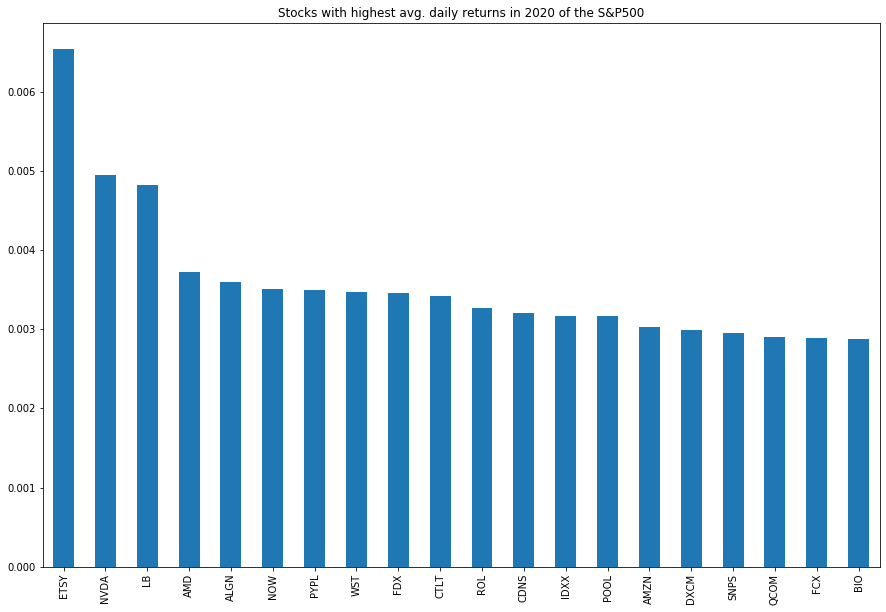

In [340]:
# Top 20 stocks with highest daily average returns

Data_returns_2020 = Data_returns[Data_returns["Reporting Date"] >= "2020-01-01"]

plt.figure(figsize = [15,10])
plt.title("Stocks with highest avg. daily returns in 2020 of the S&P500")
Data_returns_2020.drop(['Reporting Date'],axis = 1).iloc[:, 0:492].mean().sort_values(ascending = False).head(20).plot(kind = "bar")


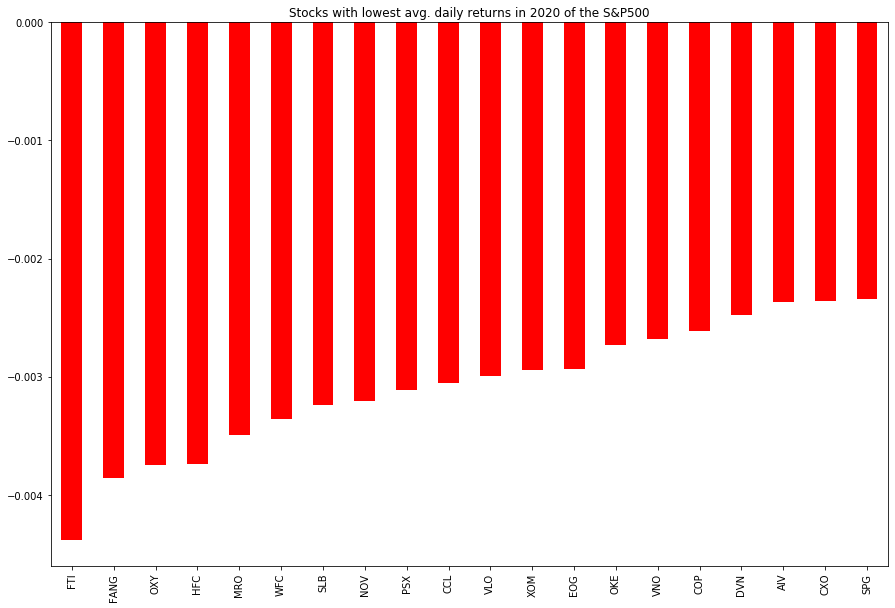

In [341]:
# Top 20 stocks with highest lowest average returns

Data_returns_2020 = Data_returns[Data_returns["Reporting Date"] >= "2020-01-01"]

plt.figure(figsize = [15,10])
plt.title("Stocks with lowest avg. daily returns in 2020 of the S&P500")
Data_returns_2020.drop(['Reporting Date'],axis = 1).iloc[:, 0:492].mean().sort_values(ascending = True).head(20).plot(kind = "bar", color = "red")


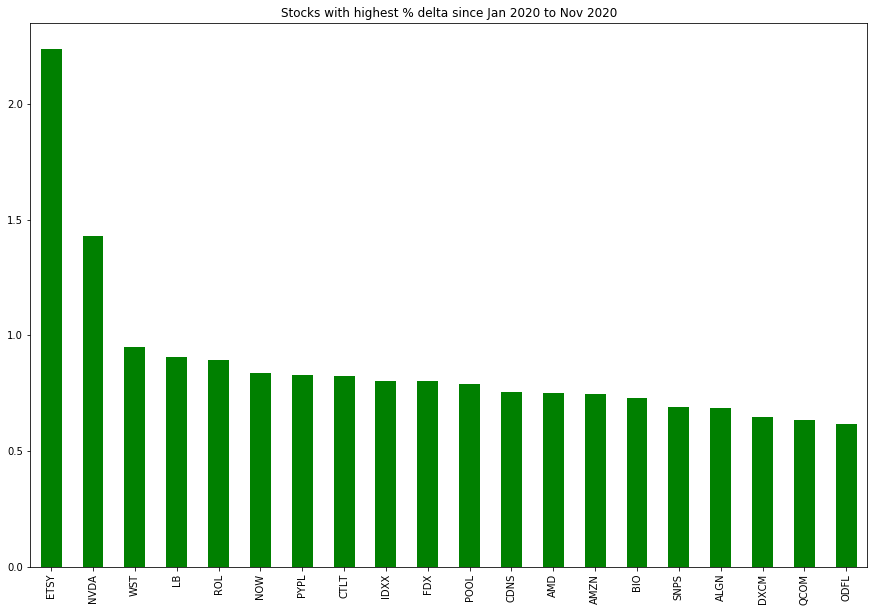

In [355]:
# Top 20 stocks with the highest price change from jan-1 2020 to nov 6 2020

Prices_deltas_2020 = final_finacial_data[(final_finacial_data["Reporting Date"] == "2020-01-02") | (final_finacial_data["Reporting Date"] == "2020-11-06")]
plt.figure(figsize = [15,10])
plt.title("Stocks with highest % delta since Jan 2020 to Nov 2020")
Prices_deltas_2020.drop(['Reporting Date'],axis = 1).iloc[:,0:492].pct_change().iloc[1:2,:].sum().sort_values(ascending = False).head(20).plot(kind = "bar" ,color = "green")

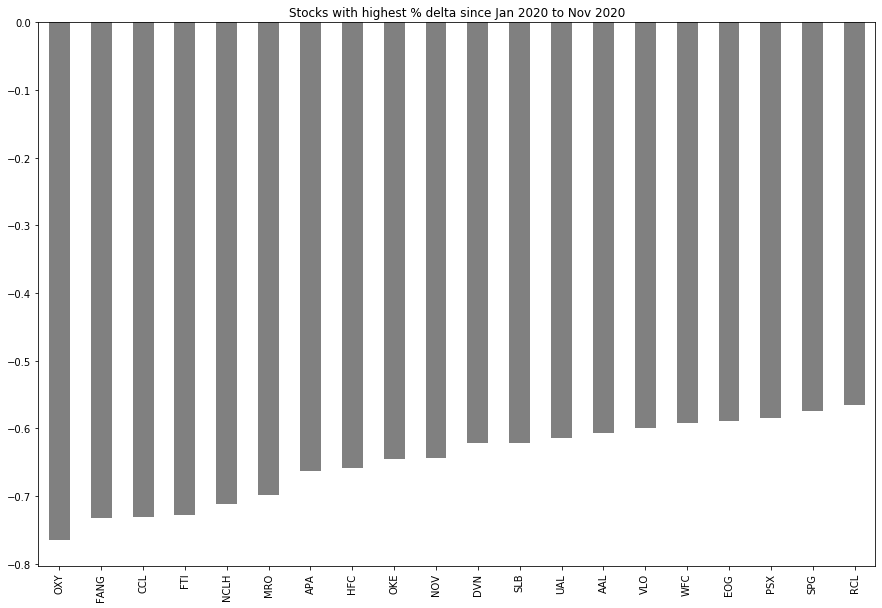

In [356]:
# Top 20 stocks with the lowest price change from jan-1 2020 to nov 6 2020

Prices_deltas_2020 = final_finacial_data[(final_finacial_data["Reporting Date"] == "2020-01-02") | (final_finacial_data["Reporting Date"] == "2020-11-06")]
plt.figure(figsize = [15,10])
plt.title("Stocks with highest % delta since Jan 2020 to Nov 2020")
Prices_deltas_2020.drop(['Reporting Date'],axis = 1).iloc[:,0:492].pct_change().iloc[1:2,:].sum().sort_values(ascending = True).head(20).plot(kind = "bar" ,color = "grey")

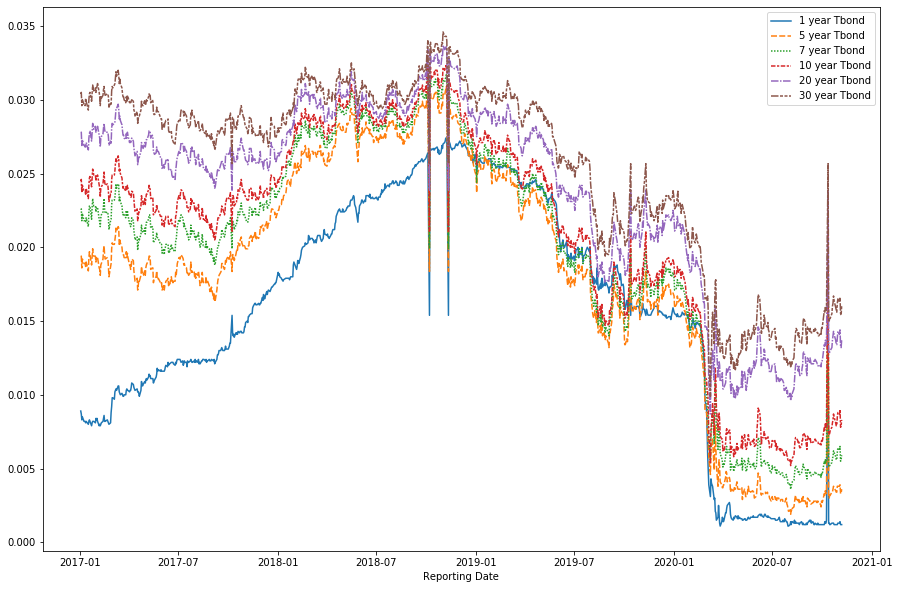

In [372]:
# EXPLANATION OF THE US ECONOMY WITH THE 3 MAIN INDEXES AND TREASURY BONDS YIEDS
plt.figure(figsize = [15,10])
sns.lineplot(data = final_finacial_data.set_index("Reporting Date")[['1 year Tbond','5 year Tbond','7 year Tbond','10 year Tbond','20 year Tbond','30 year Tbond']])

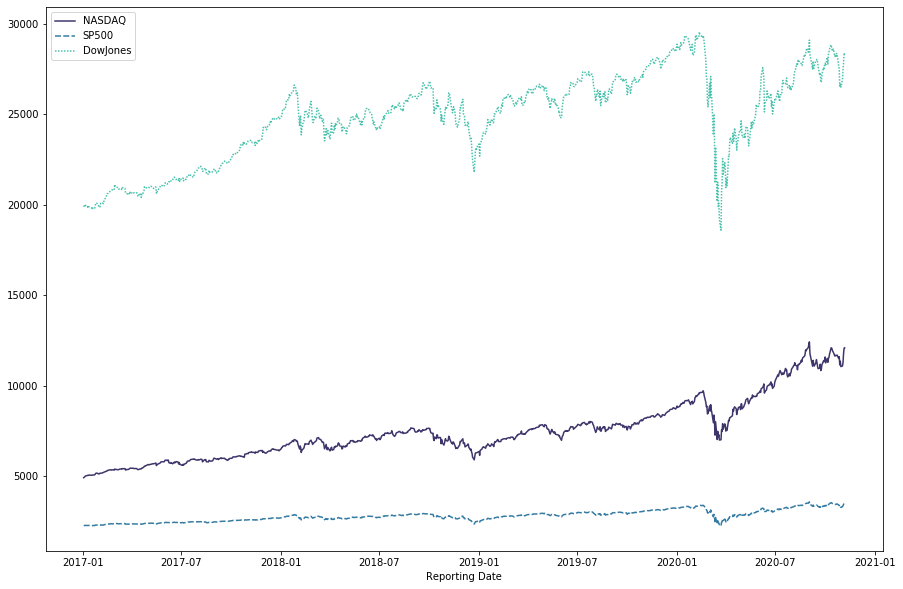

In [374]:
# EXPLANATION OF THE US ECONOMY WITH THE 3 MAIN INDEXES AND TREASURY BONDS YIEDS
plt.figure(figsize = [15,10])
sns.lineplot(data = final_finacial_data.set_index("Reporting Date")[['NASDAQ', 'SP500', 'DowJones']], palette ="mako")

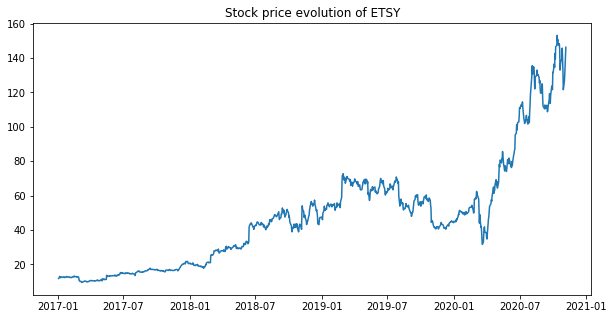

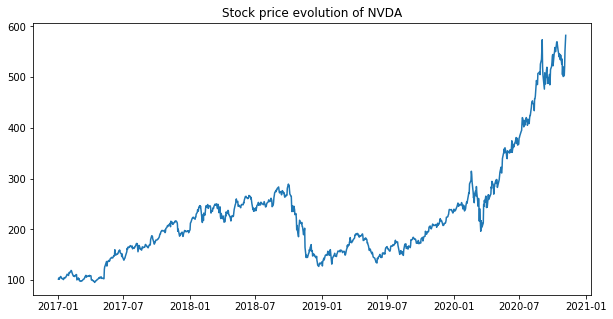

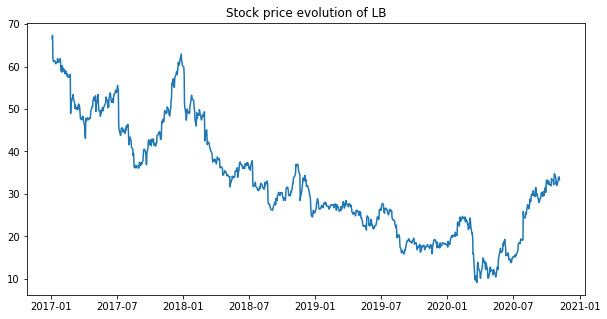

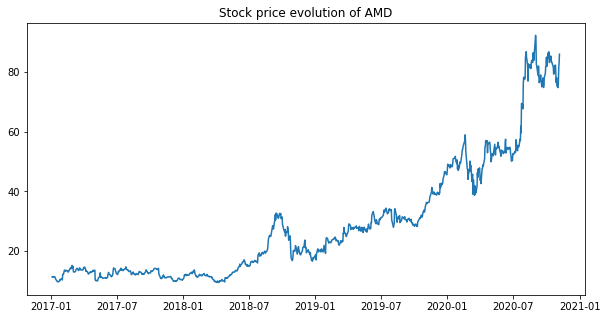

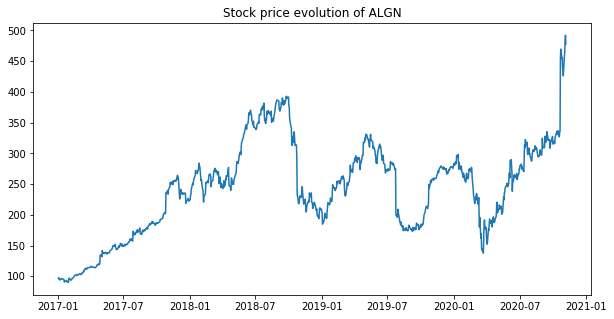

In [404]:
# Getting the the line chart and corelation with all the data frame of the top 5 performers stocks : ETYS,  NVDA, LB, AMD, ALGN
my_stocks = ['ETSY',  'NVDA', 'LB', 'AMD', 'ALGN']

for ps in performing_stocks:
    plt.figure(figsize = [10,5])
    plt.title(f'Stock price evolution of {ps}')
    sns.lineplot(data = final_finacial_data.set_index("Reporting Date")[ps], palette ="mako")
    plt.show()
    

In [ ]:
# In this step I will create the correlations with other stocks and Indexes in order to see which of them could serve as predictors for future prices

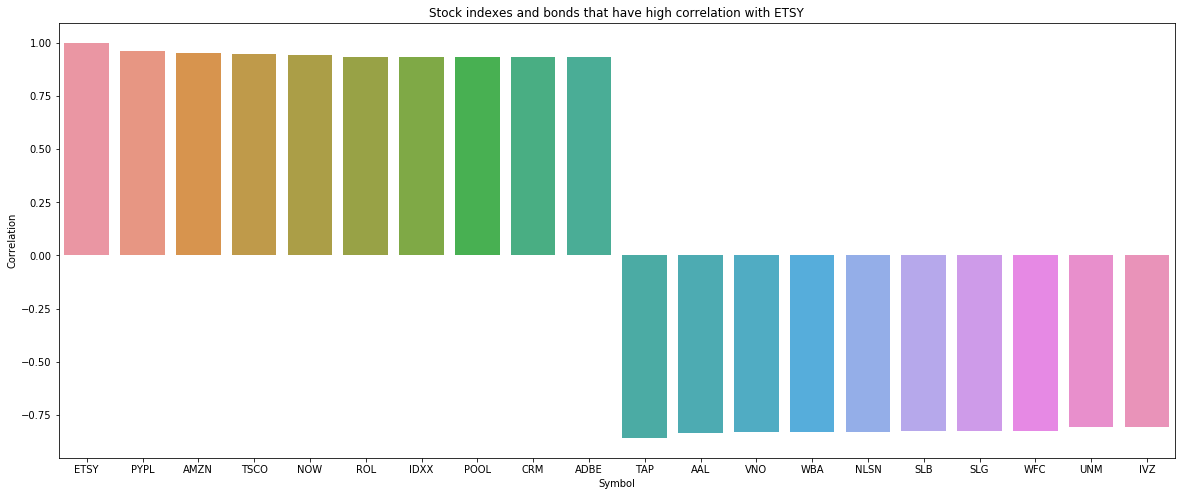

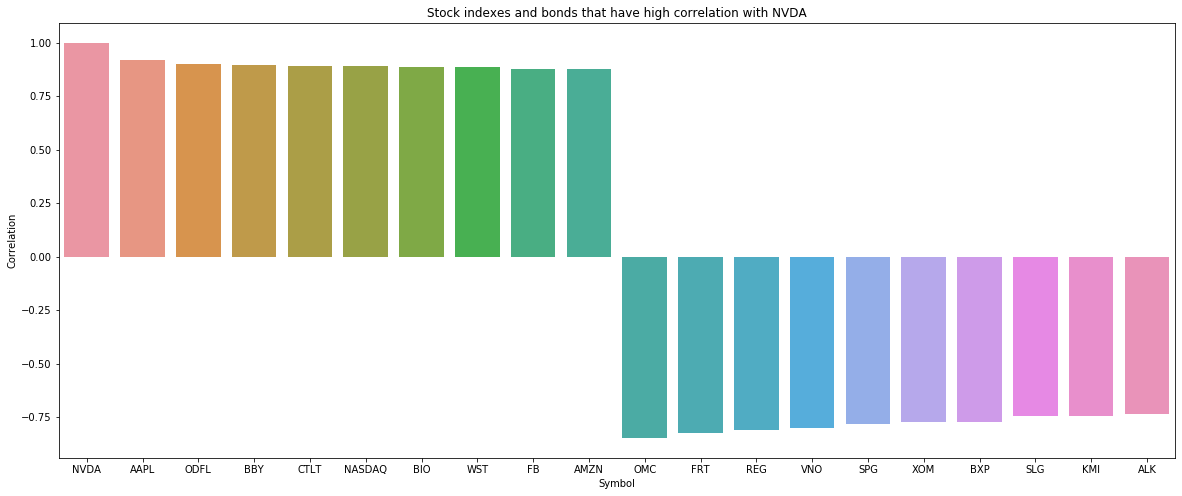

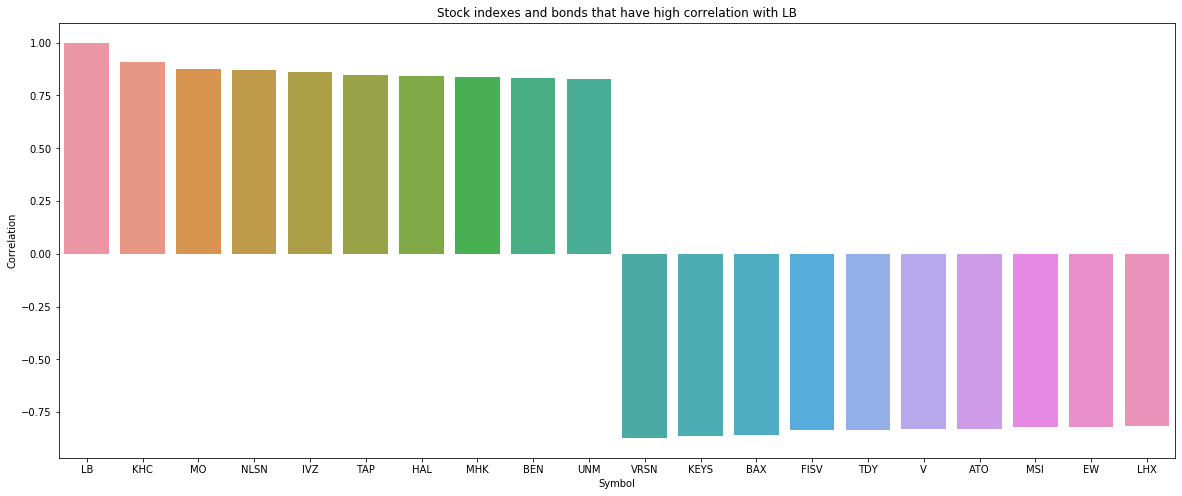

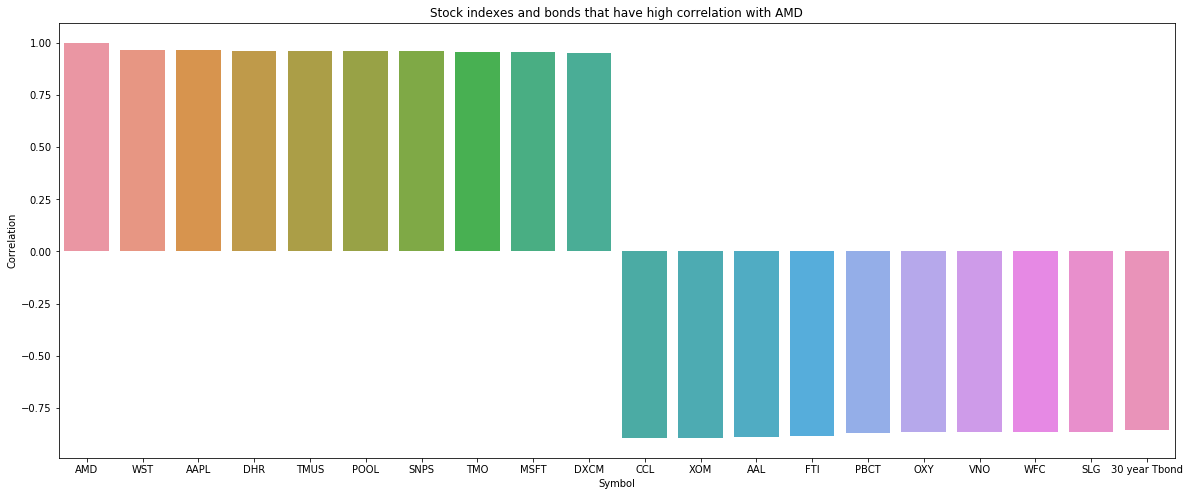

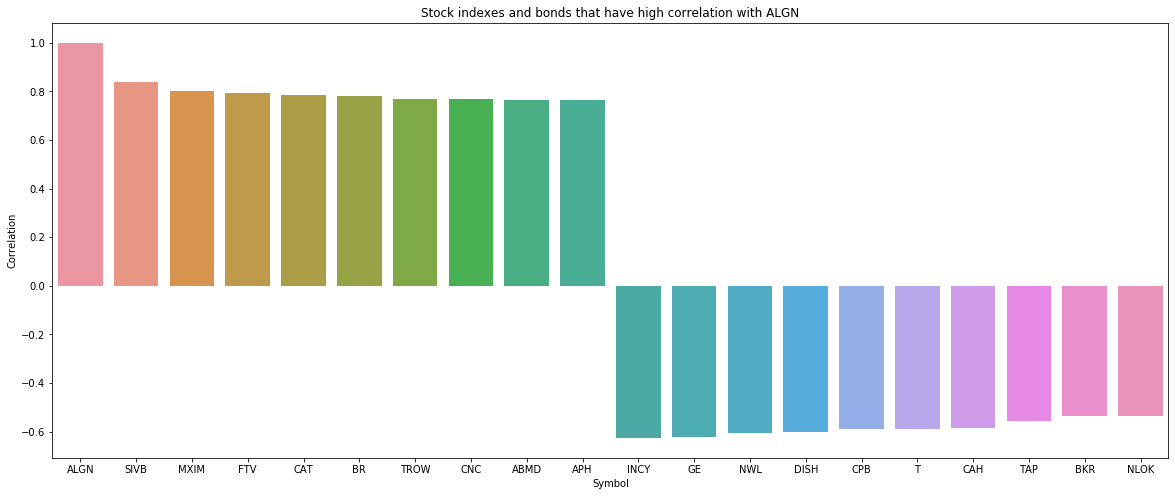

In [413]:
for stock in my_stocks:
    
    stock_symbol = [] 
    stock_correl = []
    
    for symbol in [str(i) for i in final_finacial_data.columns if i != 'Reporting Date']:
        
        correl_with_stock = np.corrcoef(final_finacial_data[stock],final_finacial_data[symbol])[1][0]
        stock_symbol.append(symbol)
        stock_correl.append(correl_with_stock)
        
    high = pd.DataFrame({"Symbol":  stock_symbol, "Correlation": stock_correl}).sort_values(by = "Correlation", ascending = False).head(10)
    low = pd.DataFrame({"Symbol":  stock_symbol, "Correlation": stock_correl}).sort_values(by = "Correlation", ascending = True).head(10)
    correlations = pd.concat([high,low])
    
    plt.figure(figsize = [20,8])
    plt.title(f'Stock indexes and bonds that have high correlation with {stock}')
    sns.barplot(data= correlations, x = "Symbol", y =  "Correlation")
        
        
        

In [ ]:
# Created a function to see the evolution of 2 variables and prove high or low correlation

In [452]:
def stock_correlation_evolution(stock, number_of_securities):
    
    stock_symbol = [] 
    stock_correl = []

    stock_symbols_timeline = []


    for symbol in [str(i) for i in final_finacial_data.columns if i != 'Reporting Date']:

        correl_with_stock = np.corrcoef(final_finacial_data[stock],final_finacial_data[symbol])[1][0]
        stock_symbol.append(symbol)
        stock_correl.append(correl_with_stock)

    high = pd.DataFrame({"Symbol":  stock_symbol, "Correlation": stock_correl}).sort_values(by = "Correlation", ascending = False).head(number_of_securities)
    low = pd.DataFrame({"Symbol":  stock_symbol, "Correlation": stock_correl}).sort_values(by = "Correlation", ascending = True).head(number_of_securities)
    correlations = pd.concat([high,low])

    for i in correlations['Symbol']:
        stock_symbols_timeline.append(i)

    for data in stock_symbols_timeline:

        plt.figure(figsize = [20,8])
        plt.title(f'Prices evolution of {stock} (blue line) with {data} (green line)')
        final_finacial_data[stock].plot(label = stock)
        plt.legend(loc='upper left')
        final_finacial_data[data].plot(secondary_y=True, style='g', label = data)
        plt.legend(loc='upper center')


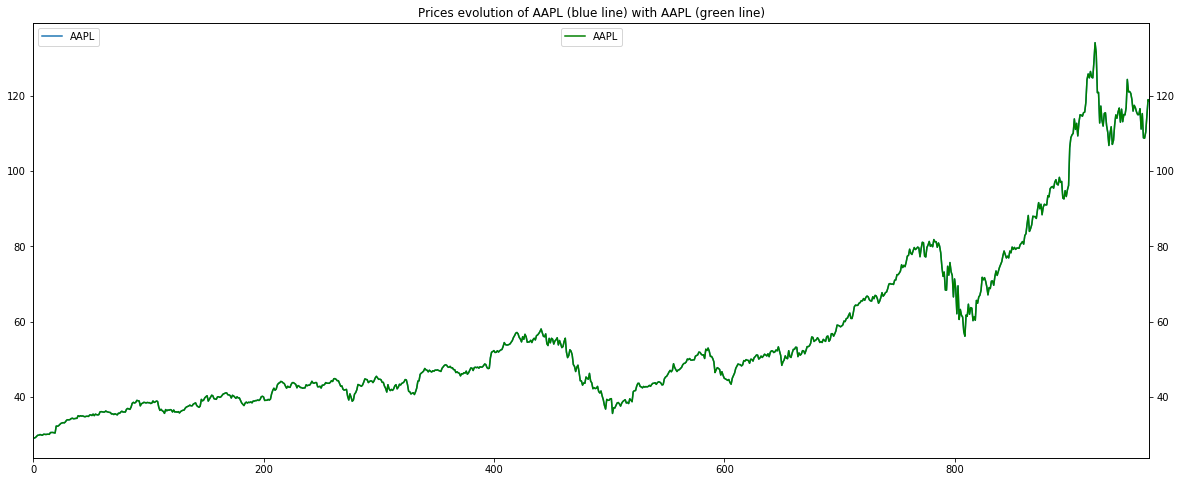

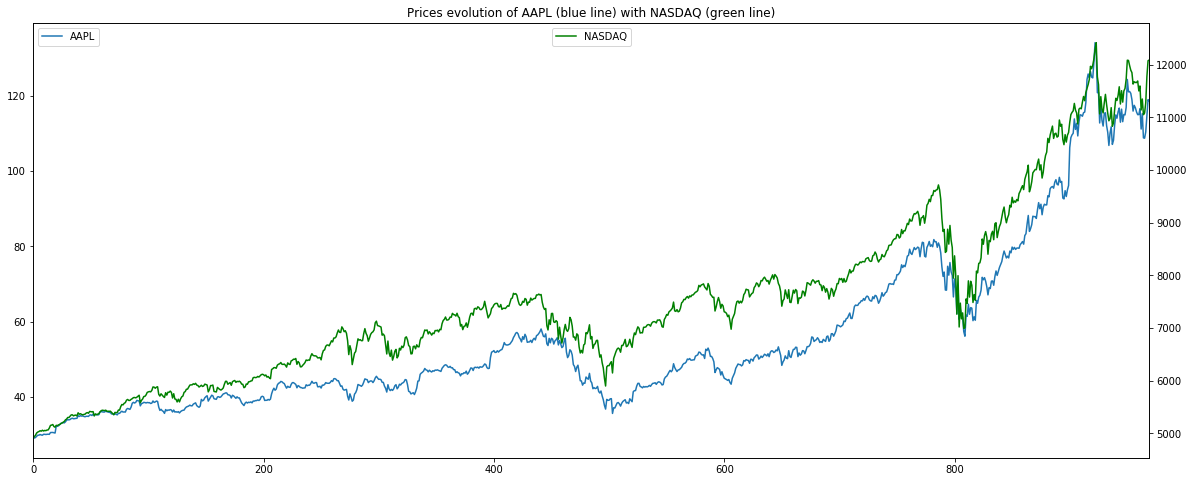

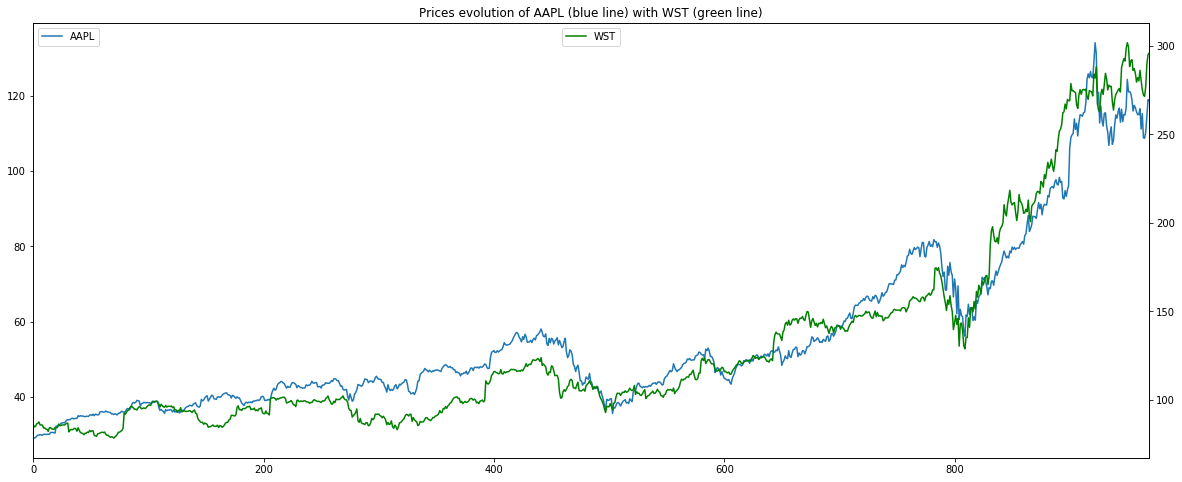

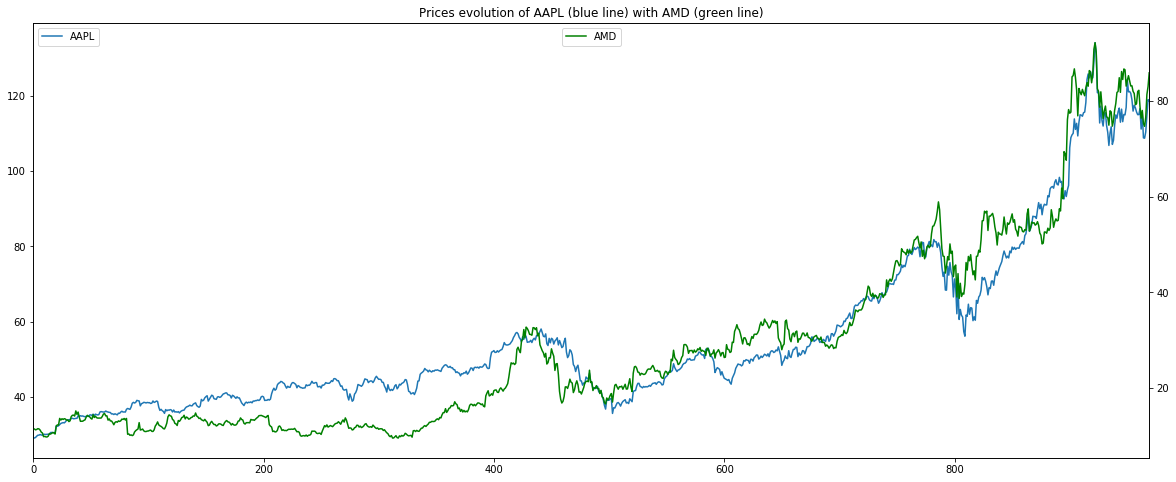

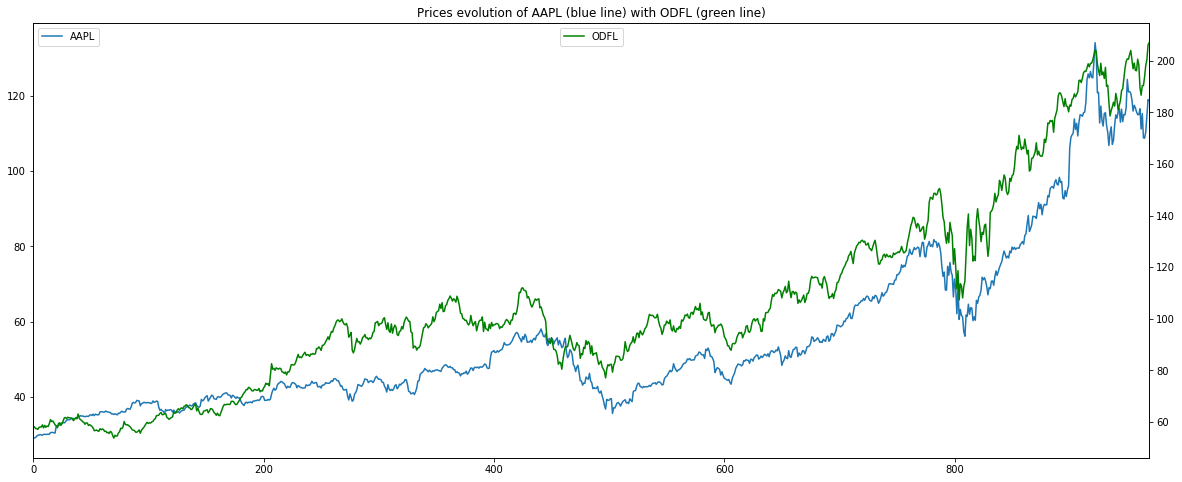

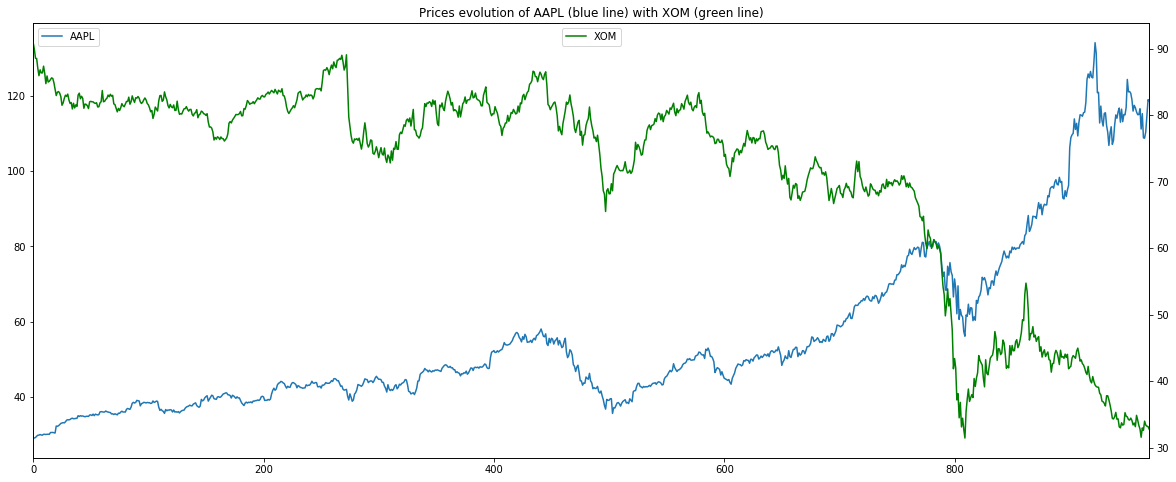

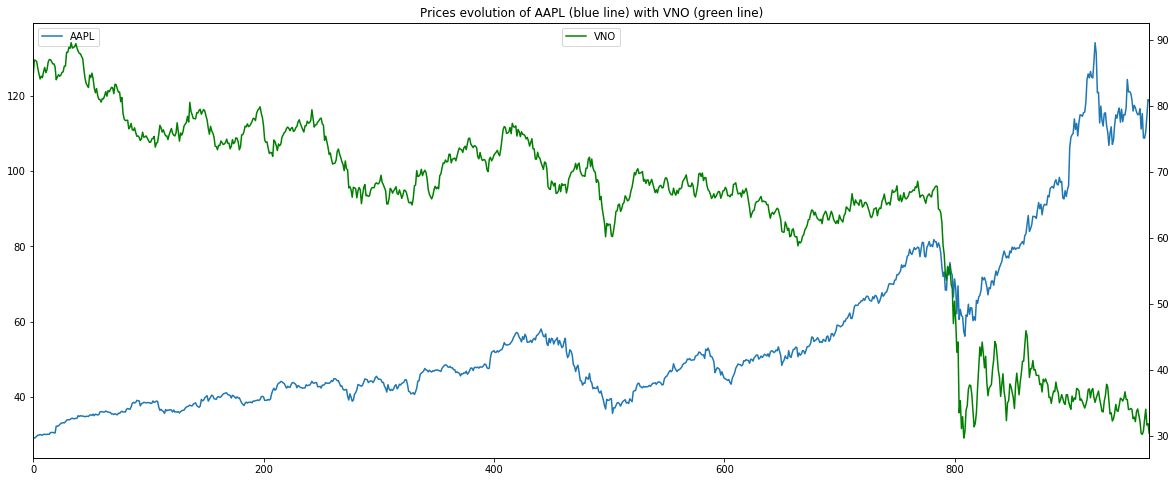

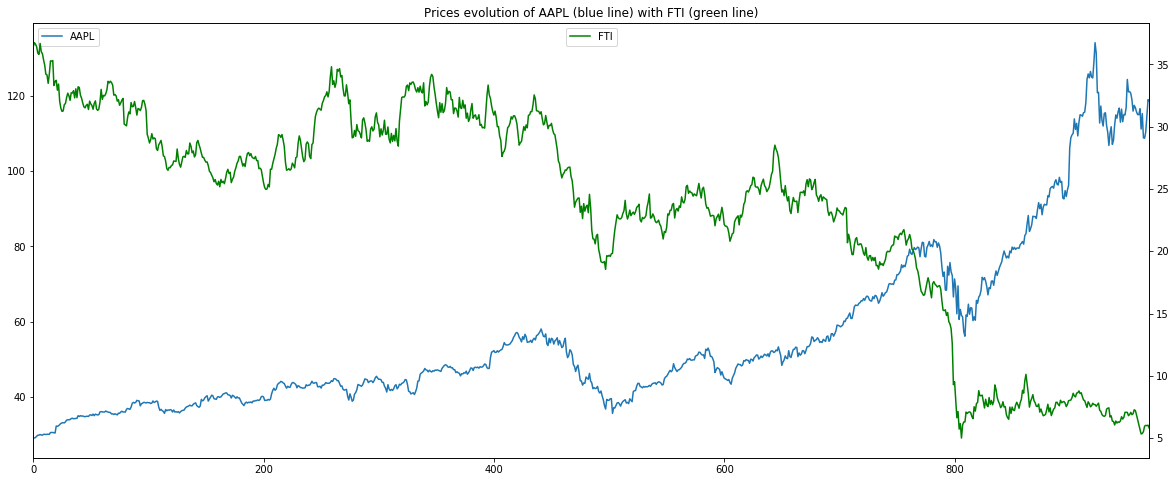

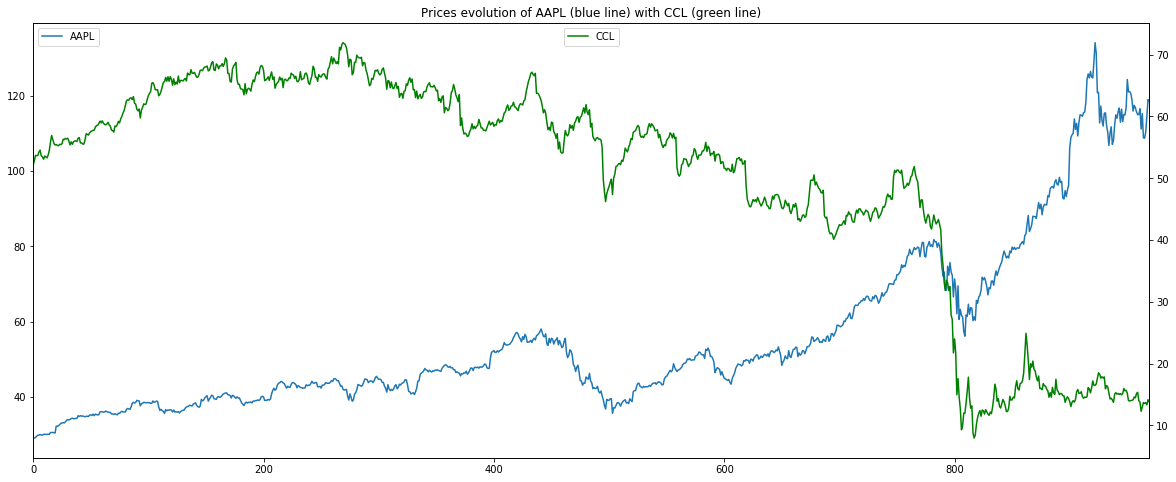

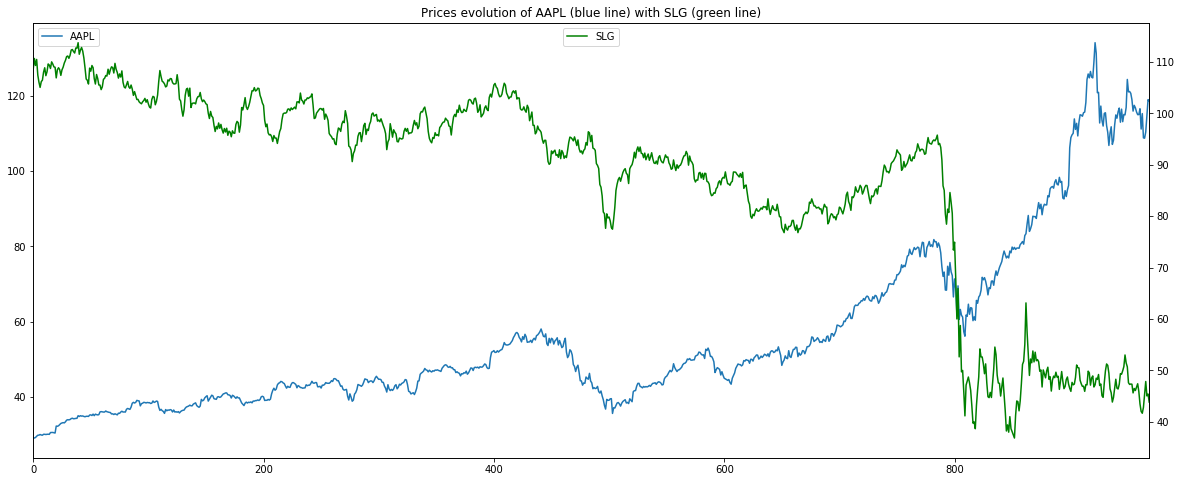

In [453]:
# EXAMPLE WITH APPLE AND TOP 5 highest and lowest securities in terms of correlation
stock_correlation_evolution("AAPL", 5)

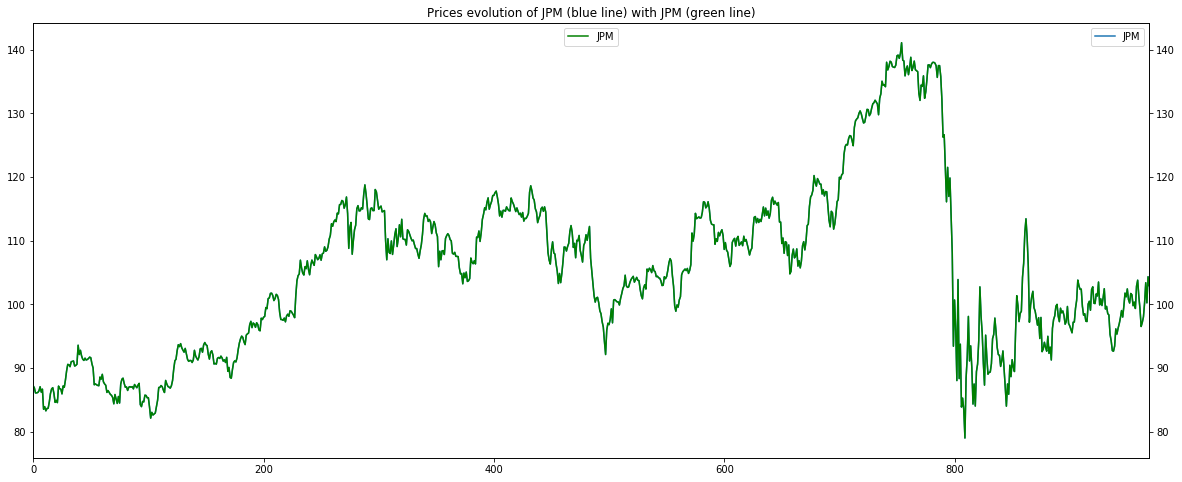

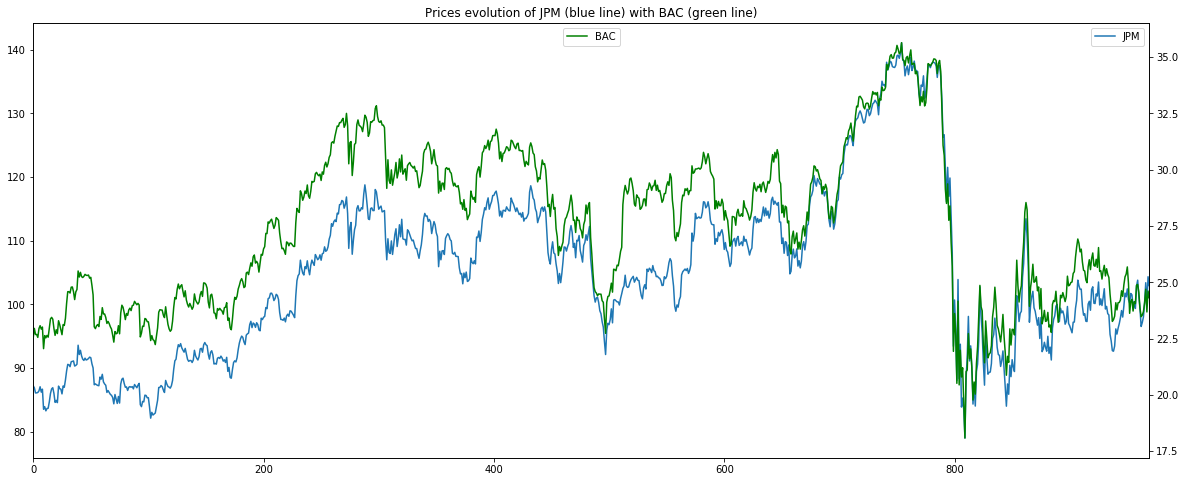

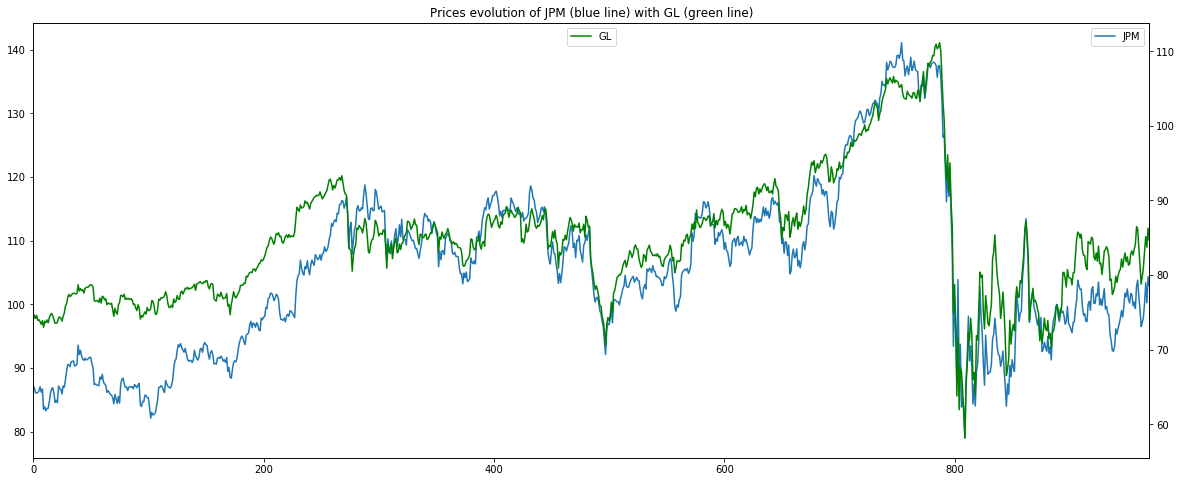

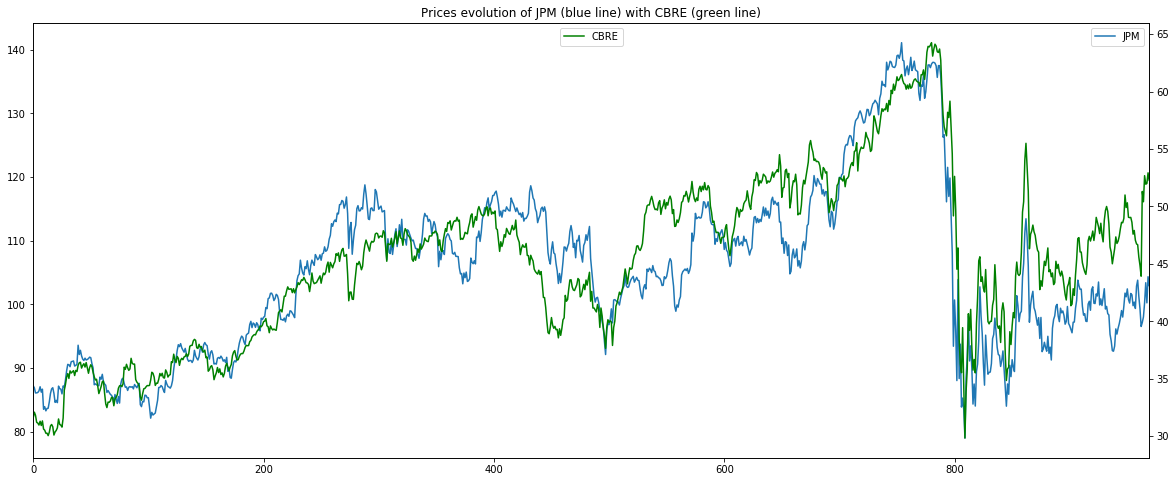

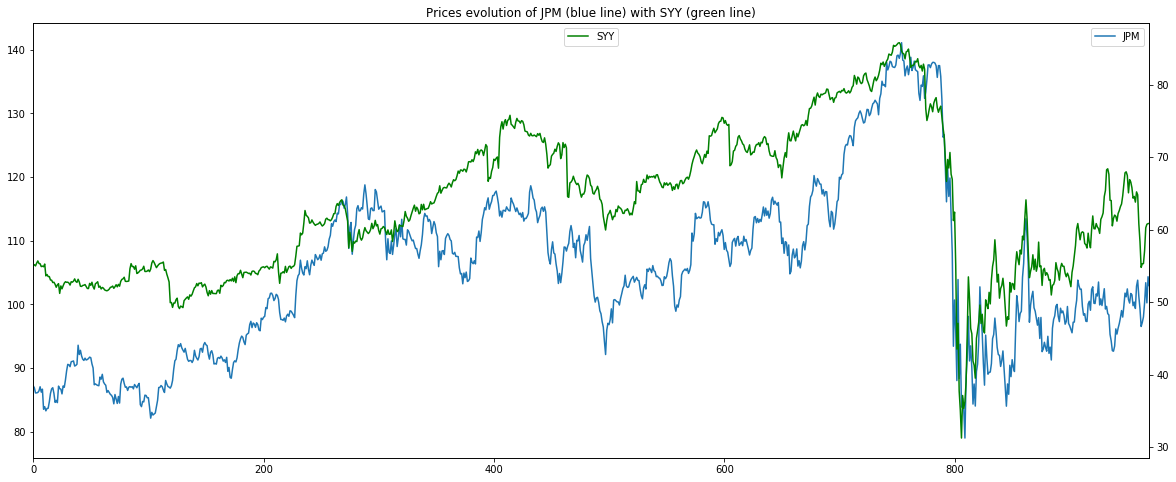

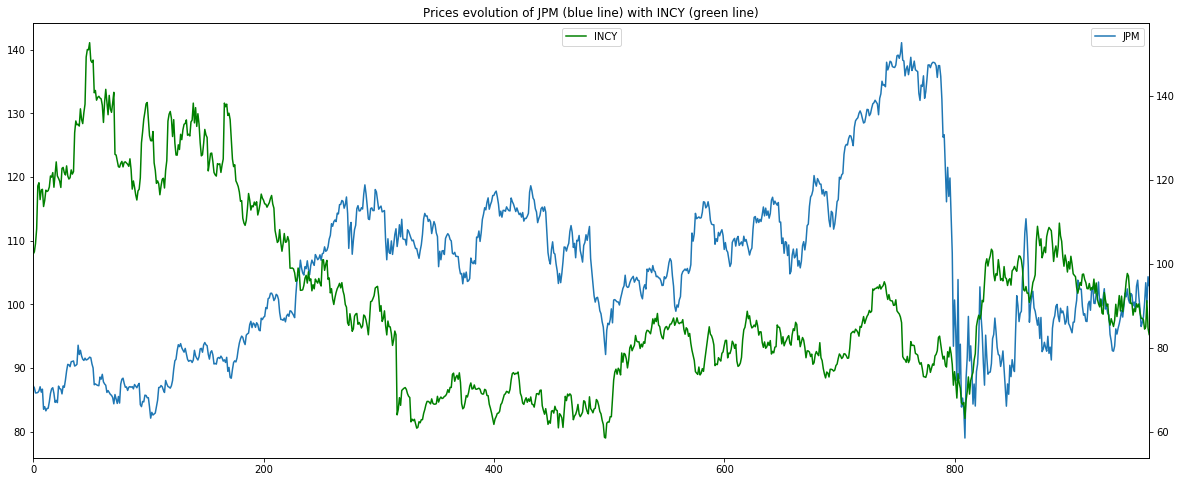

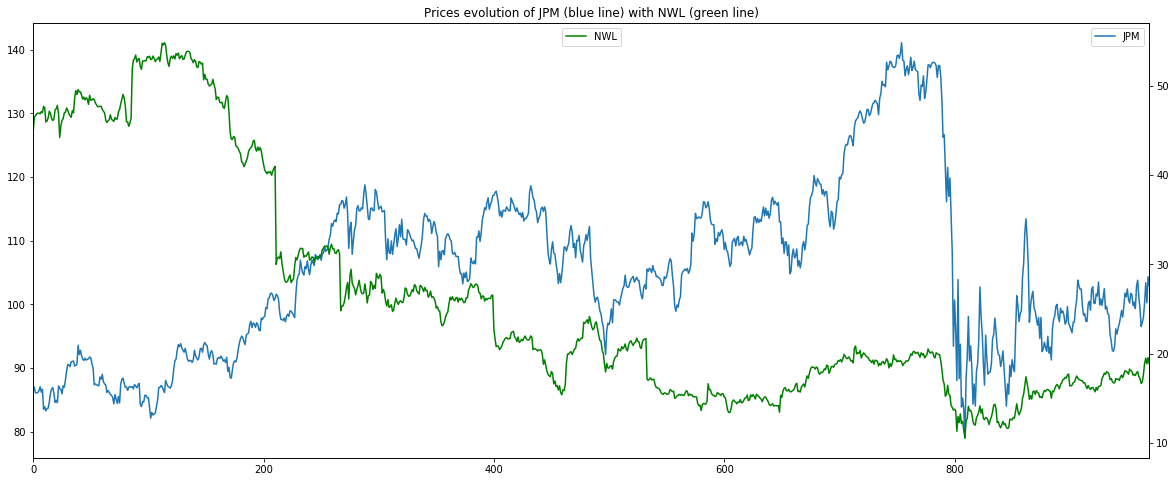

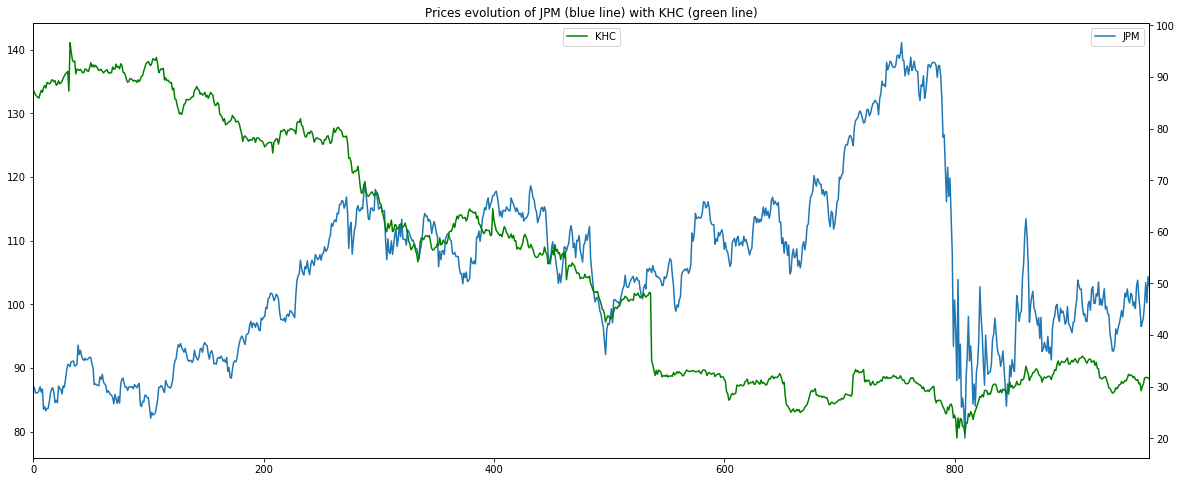

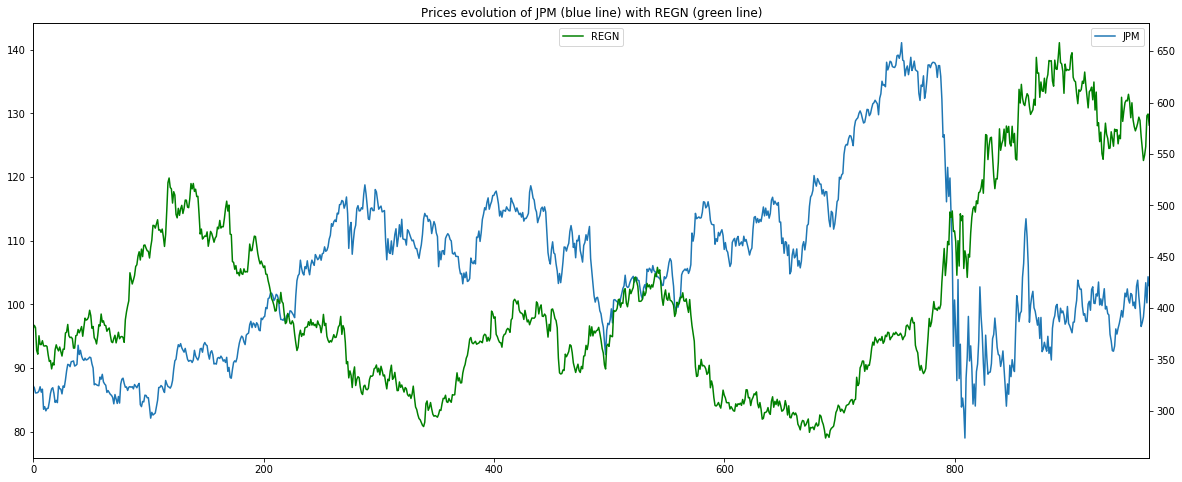

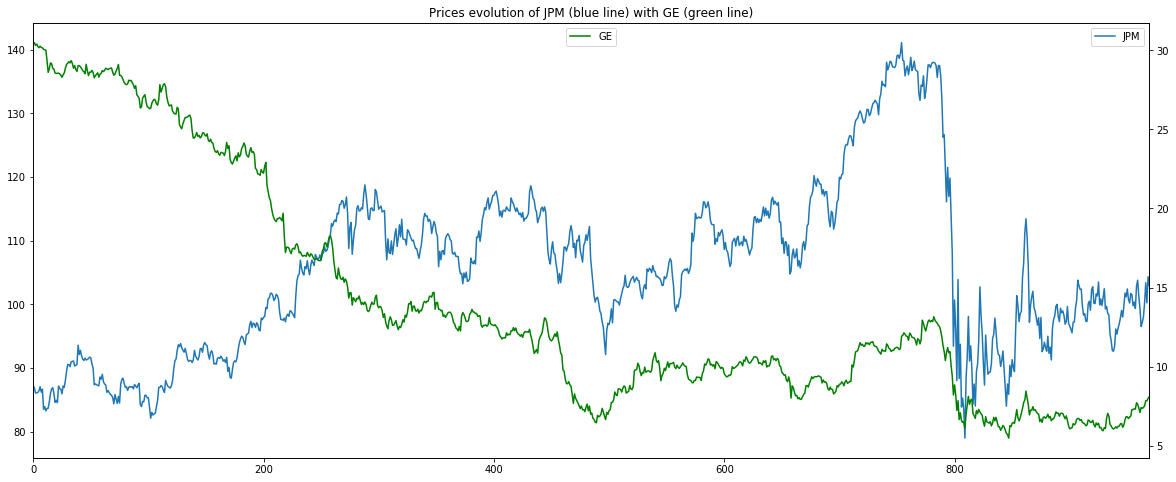

In [454]:
# EXAMPLE WITH JP MORGAN AND TOP 5 highest and lowest securities in terms of correlation
stock_correlation_evolution("JPM", 5)

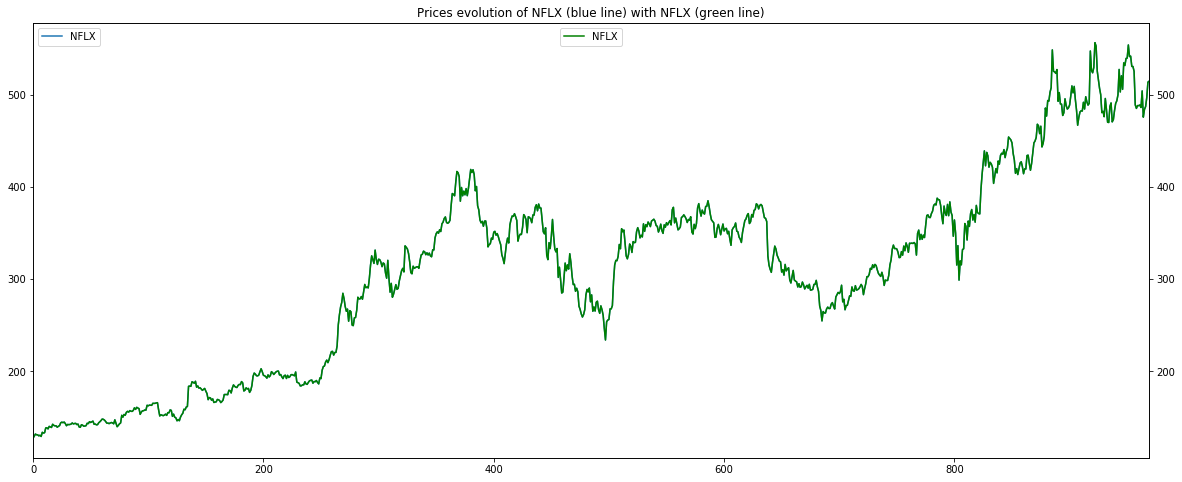

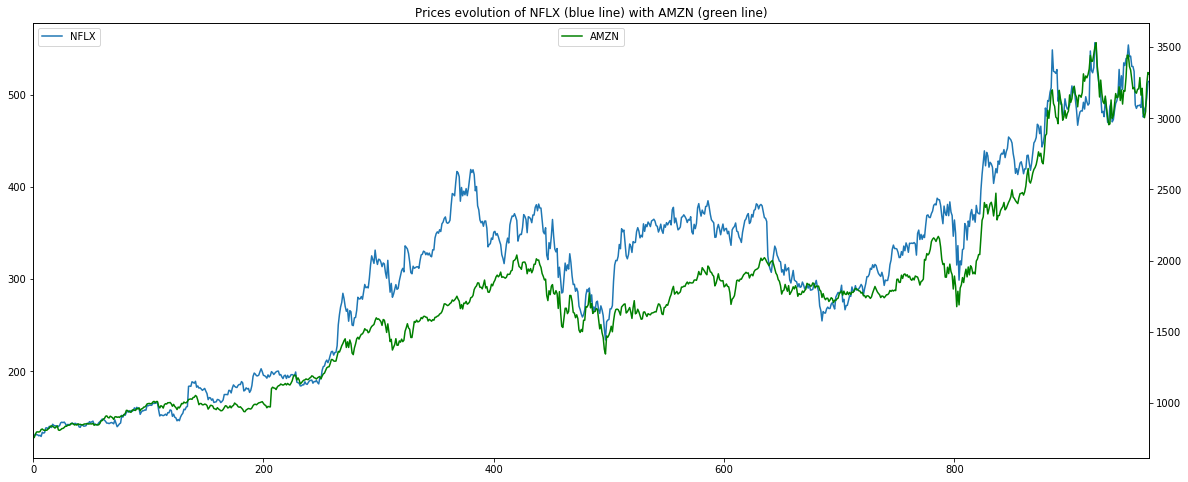

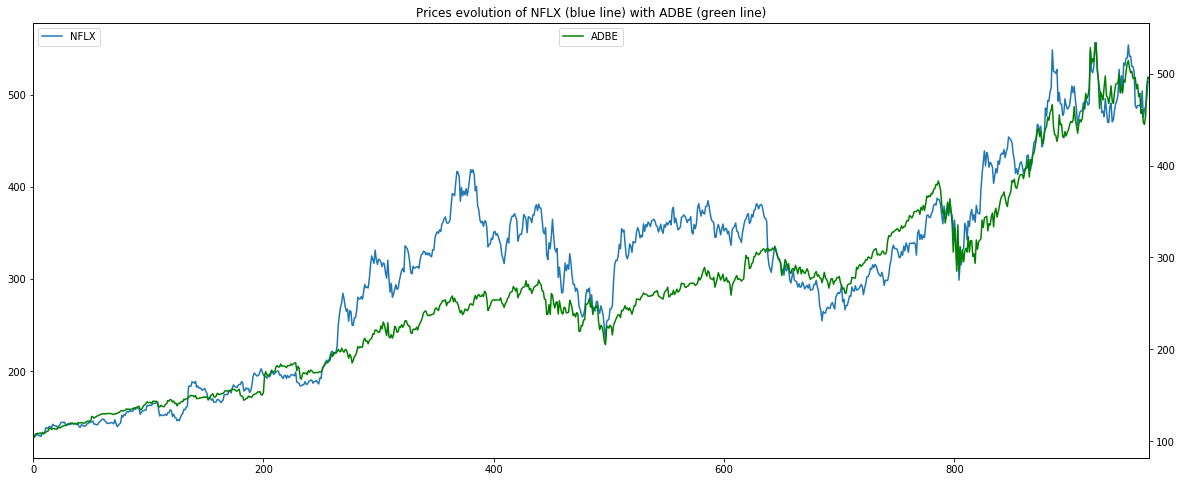

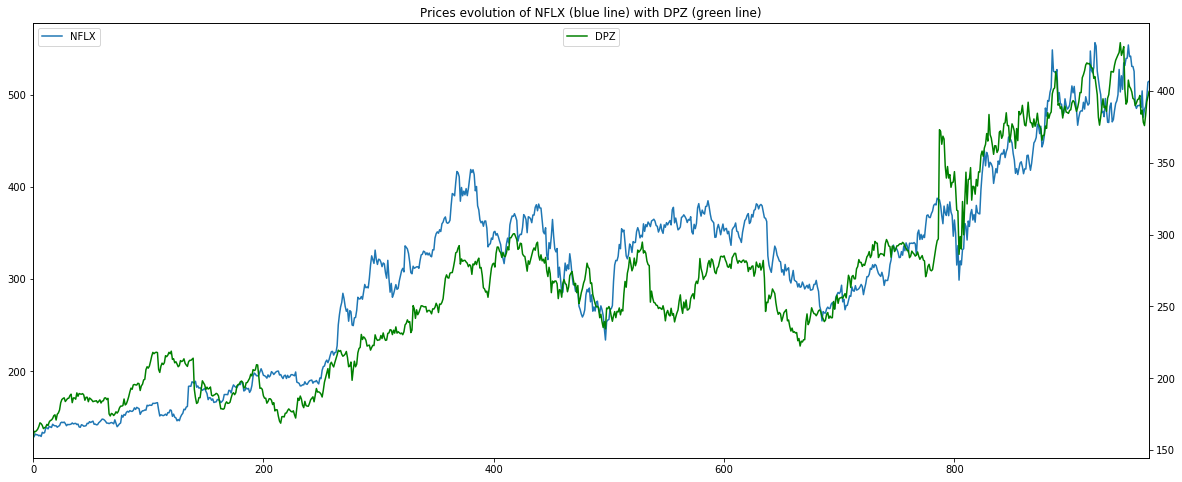

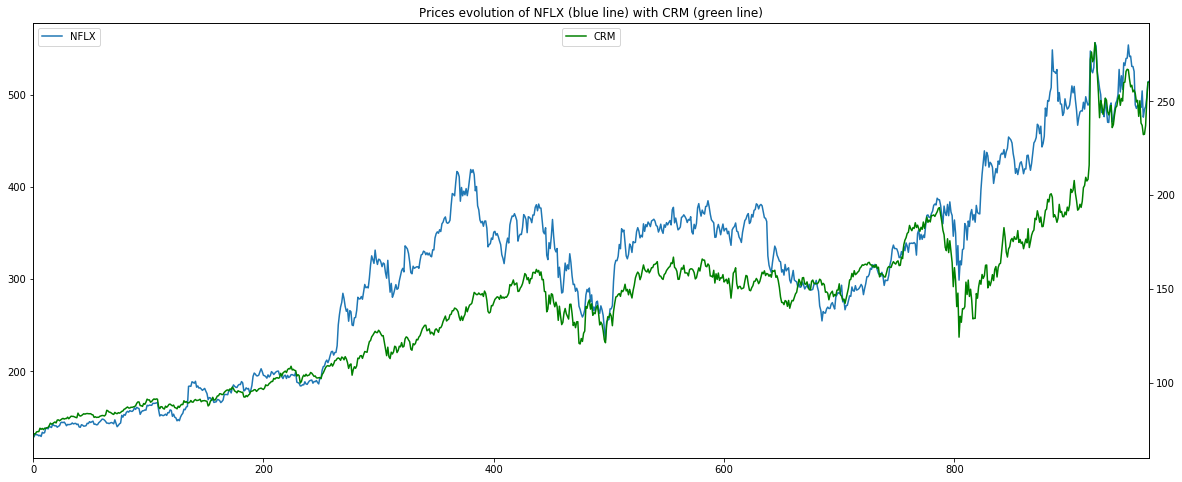

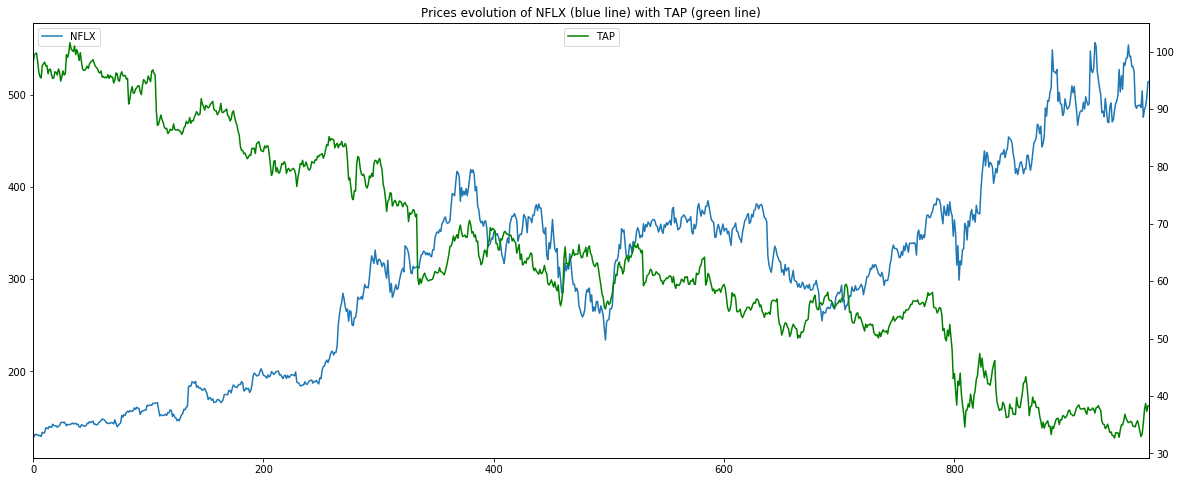

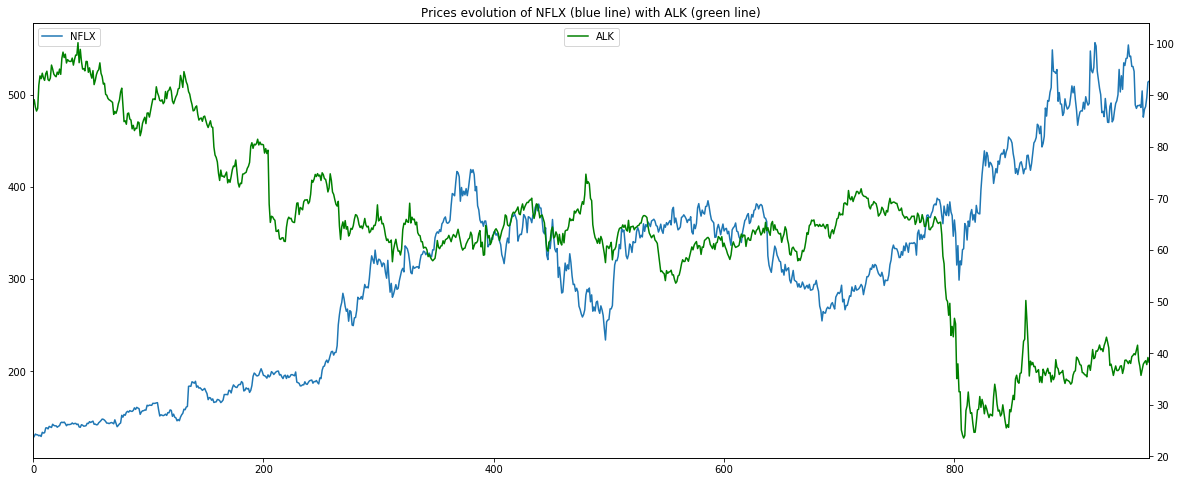

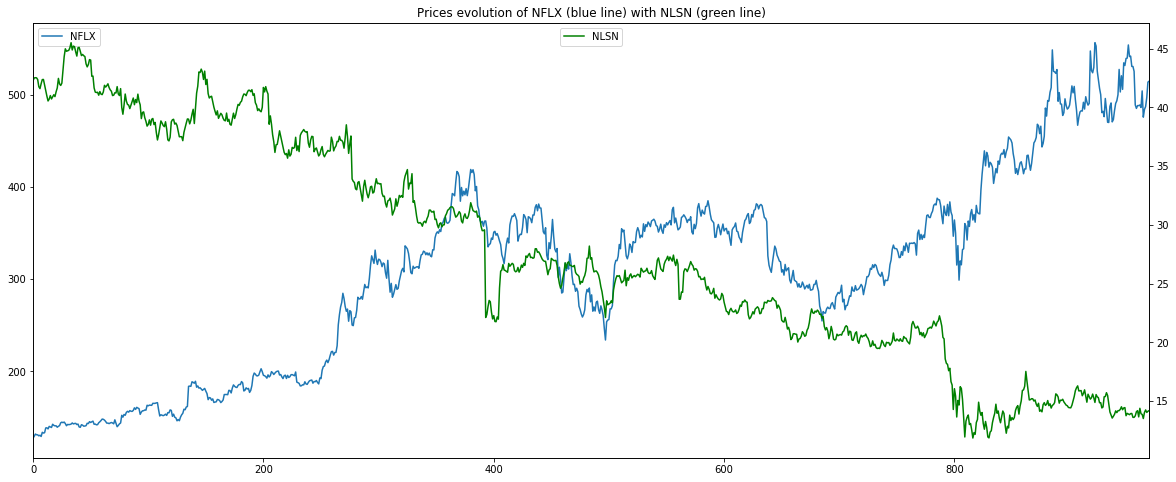

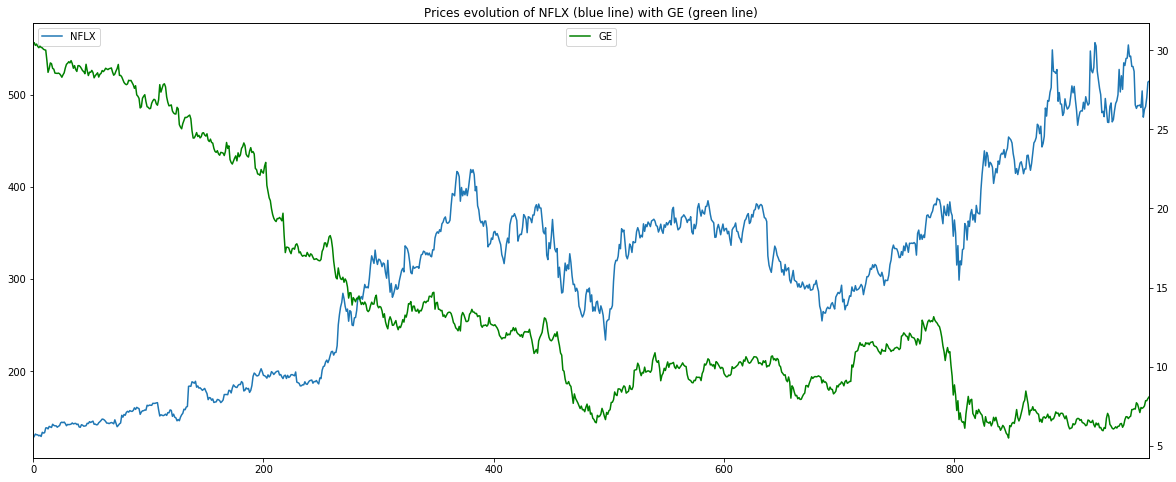

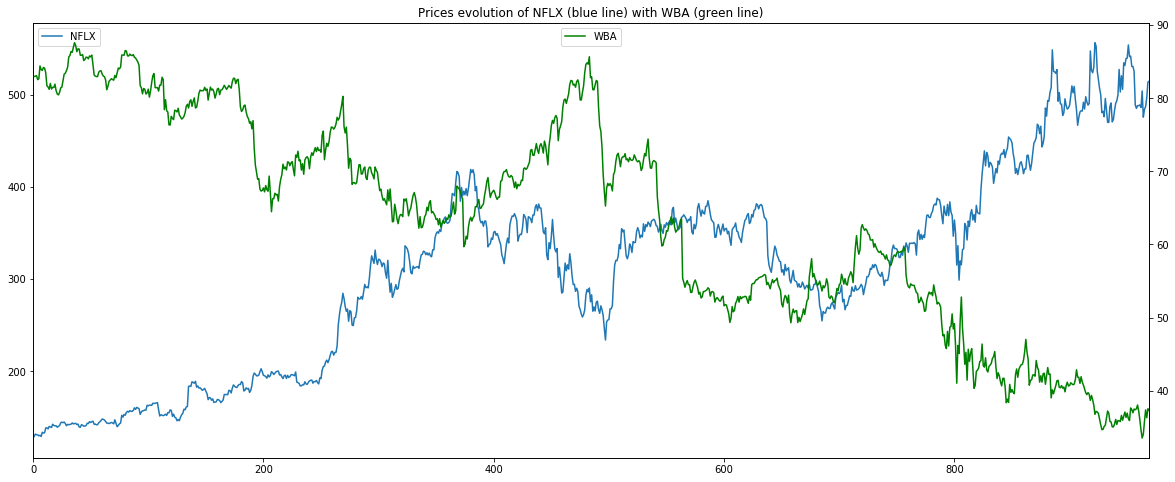

In [455]:
# EXAMPLE WITH NETFLIX AND TOP 5 highest and lowest securities in terms of correlation
stock_correlation_evolution("NFLX", 5)

### NEXT STEPS

- Create different data frames for each stock we want to predict
- Reshape those data frame with past and current data: t0, t-1, t-2,t-3, t-n
- Test Neural Networks or Random Forests to predict our selected stocks future prices


In [402]:


google_correl = []
google_symbol = [] 
symbols = [str(i) for i in final_finacial_data.columns if i != 'Reporting Date']

for symbol in symbols:
    correl_with_google = np.corrcoef(final_finacial_data["GOOGL"],final_finacial_data[symbol])[1][0]
    google_symbol.append(symbol)
    google_correl.append(correl_with_google)

    
high = pd.DataFrame({"Symbol": google_symbol, "Correlation": google_correl}).sort_values(by = "Correlation", ascending = False).head(10)
low = pd.DataFrame({"Symbol": google_symbol, "Correlation": google_correl}).sort_values(by = "Correlation", ascending = True).head(10)
pd.concat([high,low])

Symbol  Correlation
22    GOOGL     1.000000
23     GOOG     0.999649
503  NASDAQ     0.965481
40     ANSS     0.960678
313     MCO     0.955342
394    SPGI     0.953694
504   SP500     0.952892
225      HD     0.952345
342    ODFL     0.949029
402     SHW     0.948596
310     TAP    -0.856053
328    NLSN    -0.847282
467     WBA    -0.846146
197     BEN    -0.798577
397     SLB    -0.790349
462     VNO    -0.786224
24       MO    -0.773750
28      AAL    -0.772284
44      APA    -0.770717
452     UNM    -0.762069

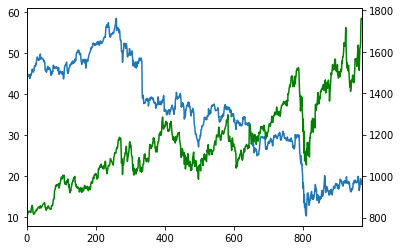

In [403]:
plt.figure()
final_finacial_data['UNM'].plot()
final_finacial_data['GOOGL'].plot(secondary_y=True, style='g')